In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

# Load the data
df = pd.read_csv('survey.csv')

print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())

# Extract written answers for later analysis
written_answers = []

# Function to collect written answers
def collect_written_answers(row):
    for col in df.columns:
        if isinstance(row[col], str) and len(row[col]) > 50:  # Longer text responses
            written_answers.append({
                'column': col,
                'answer': row[col],
                'timestamp': row['Časovni žig'] if 'Časovni žig' in row else 'Unknown'
            })

# Apply the function to each row
df.apply(collect_written_answers, axis=1)

Dataset shape: (87, 22)

Columns: ['Časovni žig', 'Koliko ste stari?\nHow old are you?', 'Na kateri fakulteti študirate? (At which faculty do you study?)', 'Kateri študijski program obiskujete? (Which study program are you enrolled in?)', 'Kateri letnik ste? (Which year of study are you in?)', 'Kateri študijski program obiskujete? (Which study program are you enrolled in?).1', 'Kateri letnik ste? (Which year of study are you in?).1', 'Kateri študijski program obiskujete? (Which study program are you enrolled in?).2', 'Kateri letnik ste? (Which year of study are you in?).2', 'Kateri študijski program obiskujete? (Which study program are you enrolled in?).3', 'Kateri letnik ste? (Which year of study are you in?).3', 'Katere znamke telefon imate? (What brand of phone do you have?)', 'Vnesite znamko telefona. (Enter your phone brand.)', 'Kateri model telefona imate? (What model of phone do you have?)', 'Kolikšna je bila cena telefona ob nakupu? (What was the price of the phone when you bou

0     None
1     None
2     None
3     None
4     None
      ... 
82    None
83    None
84    None
85    None
86    None
Length: 87, dtype: object

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

# Load the data
df = pd.read_csv('survey.csv')

print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())

# Extract written answers for later analysis
written_answers = []

# Function to collect written answers
def collect_written_answers(row):
    for col in df.columns:
        if isinstance(row[col], str) and len(row[col]) > 50:  # Longer text responses
            written_answers.append({
                'column': col,
                'answer': row[col],
                'timestamp': row['Časovni žig'] if 'Časovni žig' in row else 'Unknown'
            })

# Apply the function to each row
df.apply(collect_written_answers, axis=1)

Dataset shape: (87, 22)

Columns: ['Časovni žig', 'Koliko ste stari?\nHow old are you?', 'Na kateri fakulteti študirate? (At which faculty do you study?)', 'Kateri študijski program obiskujete? (Which study program are you enrolled in?)', 'Kateri letnik ste? (Which year of study are you in?)', 'Kateri študijski program obiskujete? (Which study program are you enrolled in?).1', 'Kateri letnik ste? (Which year of study are you in?).1', 'Kateri študijski program obiskujete? (Which study program are you enrolled in?).2', 'Kateri letnik ste? (Which year of study are you in?).2', 'Kateri študijski program obiskujete? (Which study program are you enrolled in?).3', 'Kateri letnik ste? (Which year of study are you in?).3', 'Katere znamke telefon imate? (What brand of phone do you have?)', 'Vnesite znamko telefona. (Enter your phone brand.)', 'Kateri model telefona imate? (What model of phone do you have?)', 'Kolikšna je bila cena telefona ob nakupu? (What was the price of the phone when you bou

0     None
1     None
2     None
3     None
4     None
      ... 
82    None
83    None
84    None
85    None
86    None
Length: 87, dtype: object


DEMOGRAPHIC ANALYSIS


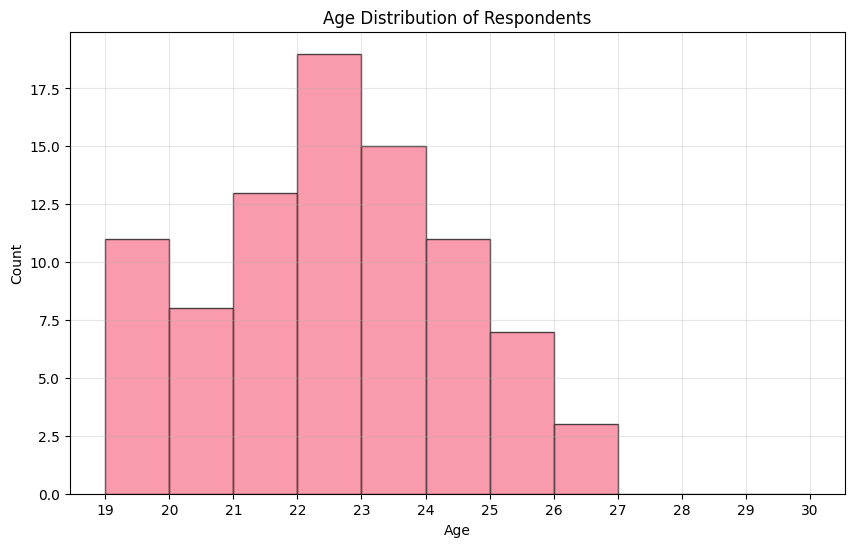

Average age: 22.1 years
Most common age: 22 years


In [3]:
# 1. DEMOGRAPHIC ANALYSIS
print("\n" + "="*50)
print("DEMOGRAPHIC ANALYSIS")
print("="*50)

# Age distribution
plt.figure(figsize=(10, 6))
age_data = df['Koliko ste stari?\nHow old are you?'].dropna()
# Convert age to numeric, handling '26+' values
age_numeric = []
for age in age_data:
    if str(age).endswith('+'):
        age_numeric.append(26)
    else:
        try:
            age_numeric.append(int(age))
        except:
            age_numeric.append(np.nan)
age_numeric = [x for x in age_numeric if not np.isnan(x)]
plt.hist(age_numeric, bins=range(19, 31), edgecolor='black', alpha=0.7)
plt.title('Age Distribution of Respondents')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(range(19, 31))
plt.grid(True, alpha=0.3)
plt.show()

print(f"Average age: {np.mean(age_numeric):.1f} years")
print(f"Most common age: {pd.Series(age_numeric).mode().iloc[0]} years")

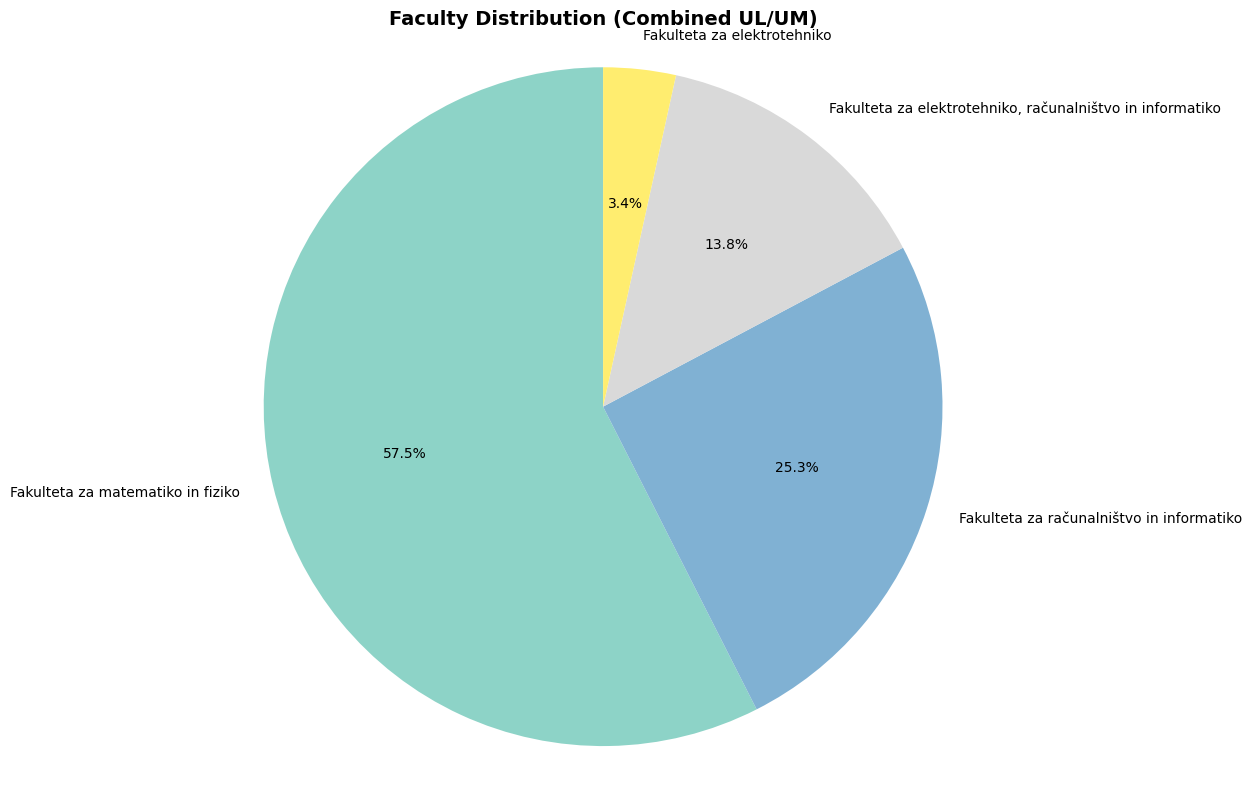

Faculty distribution (combined UL/UM):
Fakulteta za matematiko in fiziko: 50 respondents (57.5%)
Fakulteta za računalništvo in informatiko: 22 respondents (25.3%)
Fakulteta za elektrotehniko, računalništvo in informatiko: 12 respondents (13.8%)
Fakulteta za elektrotehniko: 3 respondents (3.4%)

Total respondents with faculty data: 87
Number of different faculties: 4


In [20]:
import re
# Faculty distribution - Enhanced version
plt.figure(figsize=(12, 8))
faculty_cols = [col for col in df.columns if 'fakultet' in col.lower() or 'faculty' in col.lower()]
faculty_data = []
for col in faculty_cols:
    faculty_data.extend(df[col].dropna().tolist())

# Enhanced faculty name cleaning
def clean_faculty_name(faculty):
    if pd.notna(faculty) and faculty != '':
        # Remove university abbreviations and extra text
        cleaned = faculty
        # Remove UL, UM suffixes
        cleaned = cleaned.replace(' UL', '').replace(' UM', '')
        # Remove any trailing university abbreviations in parentheses
        cleaned = re.sub(r'\s*\([^)]*UL\)', '', cleaned)
        cleaned = re.sub(r'\s*\([^)]*UM\)', '', cleaned)
        # Standardize common faculty names
        if 'matematiko in fiziko' in cleaned.lower():
            cleaned = 'Fakulteta za matematiko in fiziko'
        elif 'elektrotehniko, računalništvo in informatiko' in cleaned.lower():
            cleaned = 'Fakulteta za elektrotehniko, računalništvo in informatiko'
        elif 'računalništvo in informatiko' in cleaned.lower():
            cleaned = 'Fakulteta za računalništvo in informatiko'
        elif 'elektrotehniko' in cleaned.lower():
            cleaned = 'Fakulteta za elektrotehniko'
        return cleaned.strip()
    return faculty

faculty_clean = [clean_faculty_name(f) for f in faculty_data if pd.notna(f) and f != '']
faculty_series = pd.Series(faculty_clean)
faculty_counts = faculty_series.value_counts()

# Create pie chart
colors = plt.cm.Set3(np.linspace(0, 1, len(faculty_counts)))
plt.pie(faculty_counts.values, labels=faculty_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=colors, textprops={'fontsize': 10})
plt.title('Faculty Distribution (Combined UL/UM)', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

print("Faculty distribution (combined UL/UM):")
for faculty, count in faculty_counts.items():
    percentage = (count / len(faculty_clean)) * 100
    print(f"{faculty}: {count} respondents ({percentage:.1f}%)")

print(f"\nTotal respondents with faculty data: {len(faculty_clean)}")
print(f"Number of different faculties: {len(faculty_counts)}")

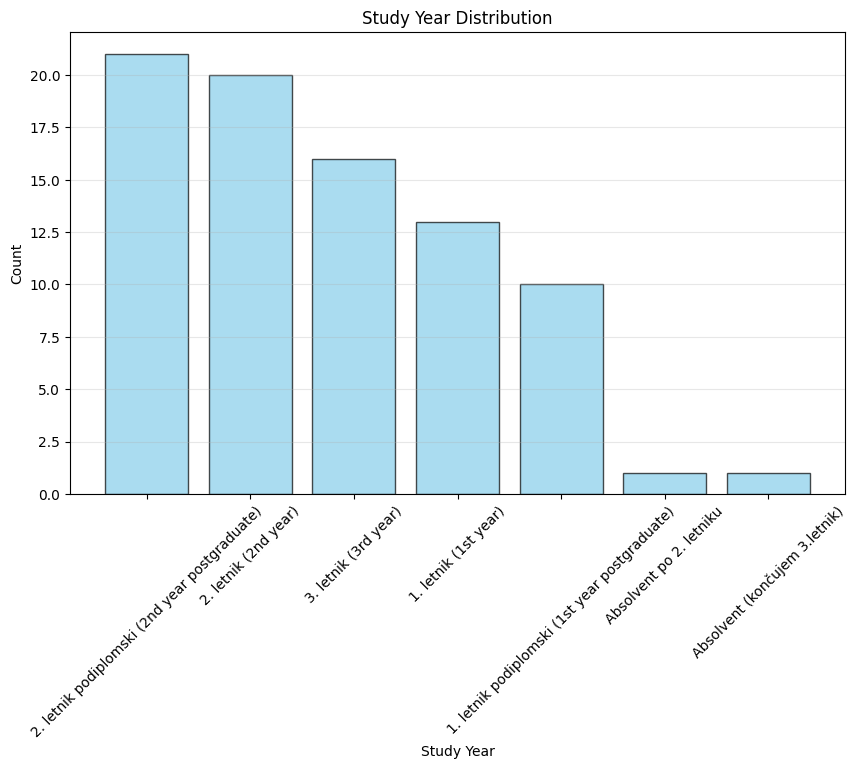

Study year distribution:
2. letnik podiplomski (2nd year postgraduate)    21
2. letnik (2nd year)                             20
3. letnik (3rd year)                             16
1. letnik (1st year)                             13
1. letnik podiplomski (1st year postgraduate)    10
Absolvent po 2. letniku                           1
Absolvent (končujem 3.letnik)                     1
Name: count, dtype: int64

PHONE MODEL ANALYSIS


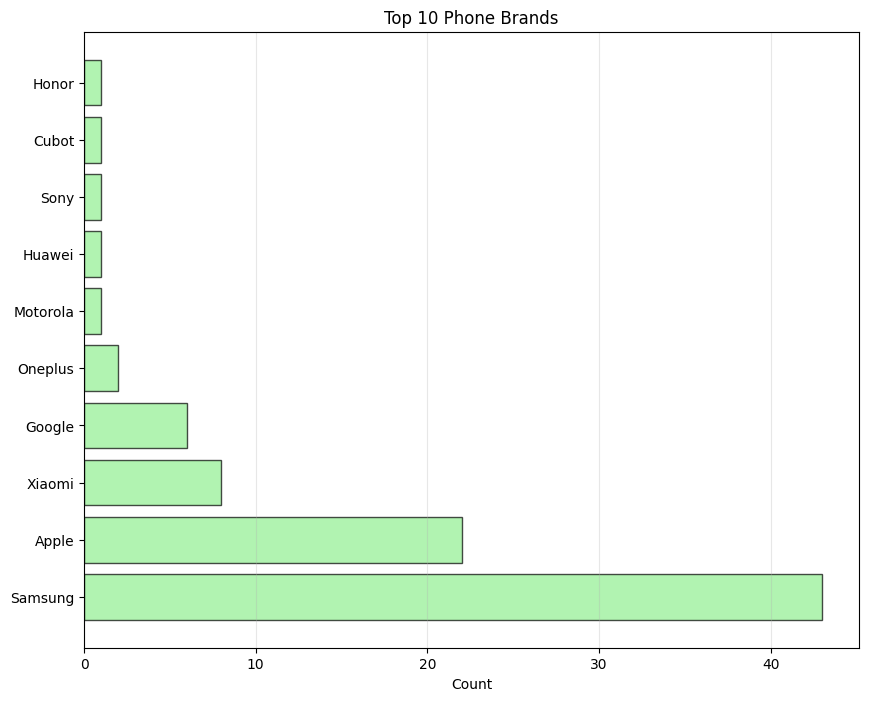

Top phone brands:
Samsung     43
Apple       22
Xiaomi       8
Google       6
Oneplus      2
Motorola     1
Huawei       1
Sony         1
Cubot        1
Honor        1
Name: count, dtype: int64


In [5]:
# Study year distribution
plt.figure(figsize=(10, 6))
year_cols = [col for col in df.columns if 'letnik' in col.lower() or 'year' in col.lower()]
year_data = []
for col in year_cols:
    year_data.extend(df[col].dropna().tolist())

year_clean = [y for y in year_data if pd.notna(y) and y != '' and 'letnik' in str(y).lower()]
year_series = pd.Series(year_clean)
year_counts = year_series.value_counts()

plt.bar(range(len(year_counts)), year_counts.values, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Study Year Distribution')
plt.xlabel('Study Year')
plt.ylabel('Count')
plt.xticks(range(len(year_counts)), year_counts.index, rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.show()

print("Study year distribution:")
print(year_counts)# 2. PHONE MODEL ANALYSIS
print("\n" + "="*50)
print("PHONE MODEL ANALYSIS")
print("="*50)

# Phone brands
plt.figure(figsize=(10, 8))
brand_cols = [col for col in df.columns if 'znamk' in col.lower() or 'brand' in col.lower()]
brand_data = []
for col in brand_cols:
    brand_data.extend(df[col].dropna().tolist())

brand_clean = [b for b in brand_data if pd.notna(b) and b != '' and b != 'Drugo (Other)']
brand_series = pd.Series(brand_clean)
brand_counts = brand_series.value_counts().head(10)

plt.barh(range(len(brand_counts)), brand_counts.values, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Top 10 Phone Brands')
plt.xlabel('Count')
plt.yticks(range(len(brand_counts)), brand_counts.index)
plt.grid(True, alpha=0.3, axis='x')
plt.show()

print("Top phone brands:")
print(brand_counts)

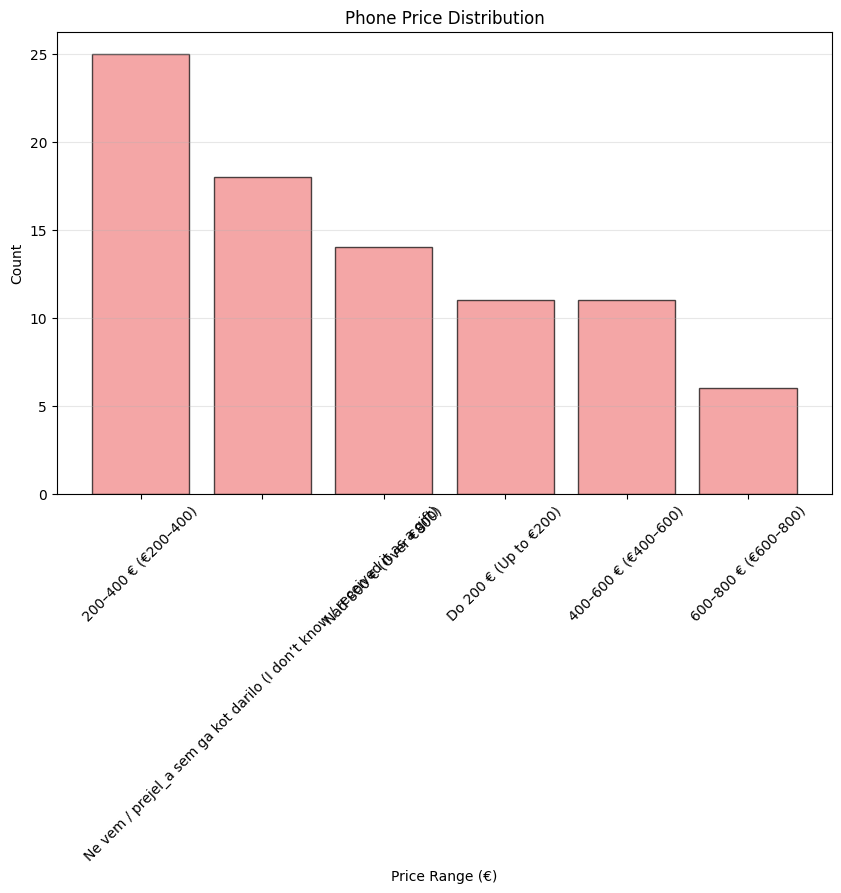

Price distribution:
Kolikšna je bila cena telefona ob nakupu? (What was the price of the phone when you bought it?)
200–400 € (€200–400)                                                          25
Ne vem / prejel_a sem ga kot darilo (I don’t know / received it as a gift)    18
Nad 800 € (Over €800)                                                         14
Do 200 € (Up to €200)                                                         11
400–600 € (€400–600)                                                          11
600–800 € (€600–800)                                                           6
Name: count, dtype: int64


In [6]:
# Price distribution
plt.figure(figsize=(10, 6))
price_col = [col for col in df.columns if 'cen' in col.lower() or 'price' in col.lower()][0]
price_data = df[price_col].dropna()
price_counts = price_data.value_counts()

plt.bar(range(len(price_counts)), price_counts.values, color='lightcoral', edgecolor='black', alpha=0.7)
plt.title('Phone Price Distribution')
plt.xlabel('Price Range (€)')
plt.ylabel('Count')
plt.xticks(range(len(price_counts)), price_counts.index, rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.show()

print("Price distribution:")
print(price_counts)

Sample purchase data:
['Pred 4 leti (2021) (4 years ago - 2021)', 'Pred 3 leti (2022) (3 years ago - 2022)', 'Pred 2 leti (2023) (2 years ago - 2023)', 'Pred 3 leti (2022) (3 years ago - 2022)', 'Pred 5 leti (2020) (5 years ago - 2020)', 'Letos (2025) (This year - 2025)', 'Pred 2 leti (2023) (2 years ago - 2023)', 'Letos (2025) (This year - 2025)', 'Pred 5 leti (2020) (5 years ago - 2020)', 'Pred 2 leti (2023) (2 years ago - 2023)']


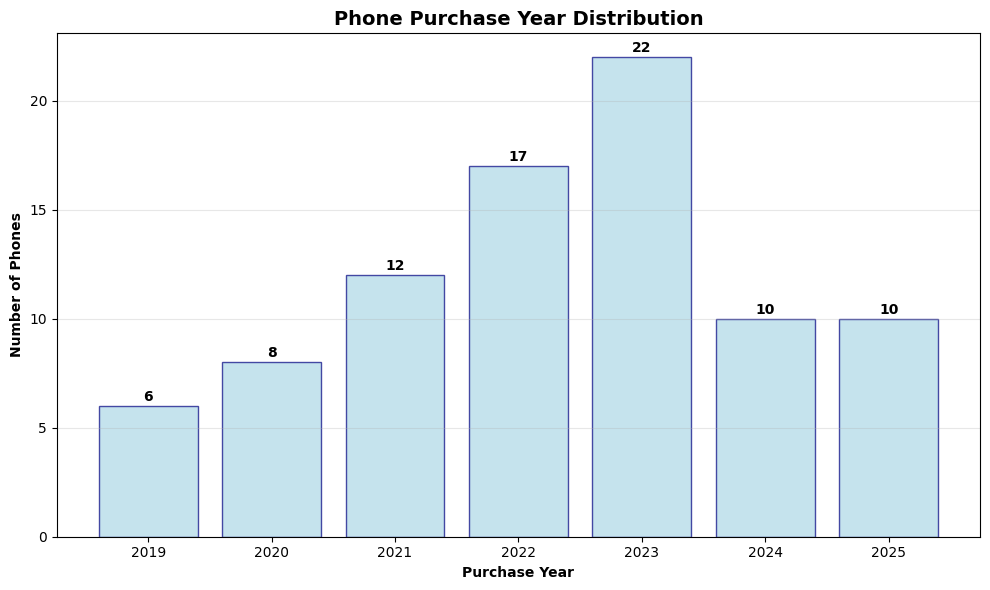

Purchase year distribution:
2019     6
2020     8
2021    12
2022    17
2023    22
2024    10
2025    10
Name: count, dtype: int64

Statistics:
Total responses with purchase data: 85
Successfully extracted years: 85
Extraction rate: 100.0%

Average phone age: 2.7 years
Oldest phone: 6 years old
Newest phone: 0 years old


In [15]:
# Purchase year analysis - Simple version
plt.figure(figsize=(10, 6))
purchase_col = 'Kdaj ste telefon kupili? (When did you buy your phone?)'
purchase_data = df[purchase_col].dropna()

print(f"Sample purchase data:")
print(purchase_data.head(10).tolist())

# Extract years using simple string matching
years = []
for text in purchase_data:
    text_str = str(text)
    
    # Direct year extraction from parentheses
    if '(2020)' in text_str:
        years.append(2020)
    elif '(2021)' in text_str:
        years.append(2021)
    elif '(2022)' in text_str:
        years.append(2022)
    elif '(2023)' in text_str:
        years.append(2023)
    elif '(2024)' in text_str:
        years.append(2024)
    elif '(2025)' in text_str:
        years.append(2025)
    # Handle special cases
    elif 'Letos' in text_str or 'This year' in text_str:
        years.append(2025)
    elif 'Lani' in text_str or 'Last year' in text_str:
        years.append(2024)
    elif 'Pred več kot 5 leti' in text_str or 'More than 5 years ago' in text_str:
        years.append(2019)

if years:
    year_counts = pd.Series(years).value_counts().sort_index()
    
    plt.bar(year_counts.index, year_counts.values, color='lightblue', alpha=0.7, edgecolor='navy')
    plt.title('Phone Purchase Year Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('Purchase Year', fontweight='bold')
    plt.ylabel('Number of Phones', fontweight='bold')
    plt.grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for i, count in enumerate(year_counts.values):
        plt.text(year_counts.index[i], count + 0.1, str(count), 
                ha='center', va='bottom', fontweight='bold', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    print("Purchase year distribution:")
    print(year_counts)
    print(f"\nStatistics:")
    print(f"Total responses with purchase data: {len(purchase_data)}")
    print(f"Successfully extracted years: {len(years)}")
    print(f"Extraction rate: {len(years)/len(purchase_data)*100:.1f}%")
    
    # Additional analysis
    current_year = 2025
    phone_ages = [current_year - year for year in years]
    print(f"\nAverage phone age: {np.mean(phone_ages):.1f} years")
    print(f"Oldest phone: {current_year - min(years)} years old")
    print(f"Newest phone: {current_year - max(years)} years old")
    
else:
    print("No years could be extracted. Debugging info:")
    print("Unique values in purchase data:")
    print(purchase_data.unique())


PHONE LIFECYCLE AND DISPOSAL ANALYSIS


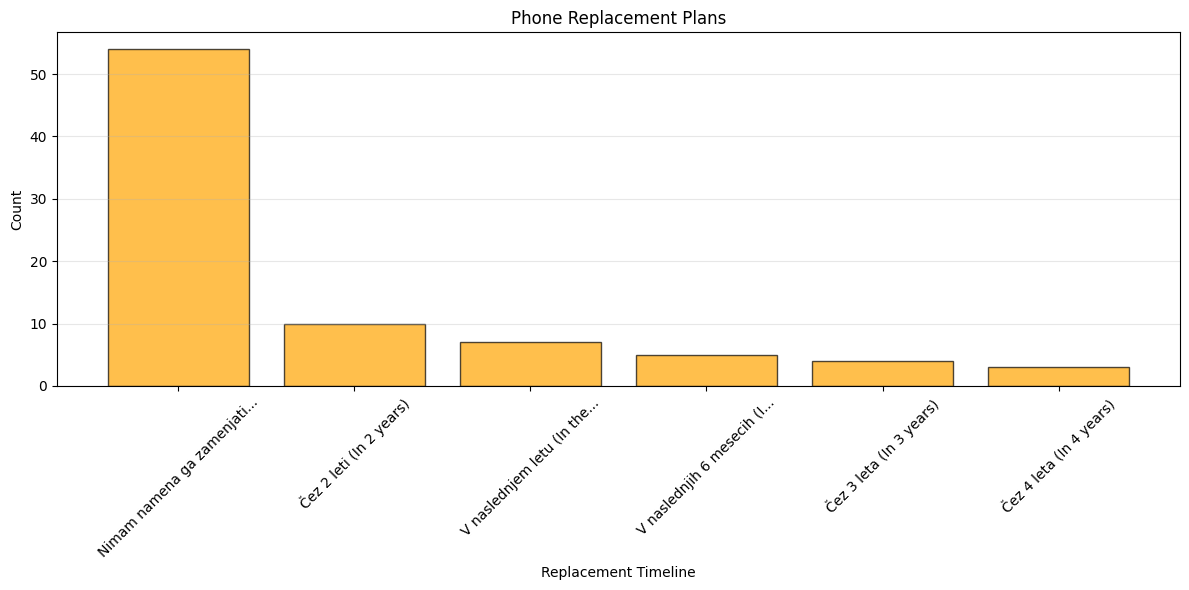

Replacement plans:
Kdaj imate namen telefon zamenjati? (When do you plan to replace your phone?)
Nimam namena ga zamenjati, dokler deluje (I don’t plan to replace it as long as it works)    54
Čez 2 leti (In 2 years)                                                                      10
V naslednjem letu (In the next year)                                                          7
V naslednjih 6 mesecih (In the next 6 months)                                                 5
Čez 3 leta (In 3 years)                                                                       4
Čez 4 leta (In 4 years)                                                                       3
Name: count, dtype: int64


In [8]:
# 3. PHONE LIFECYCLE AND DISPOSAL ANALYSIS
print("\n" + "="*50)
print("PHONE LIFECYCLE AND DISPOSAL ANALYSIS")
print("="*50)

# Replacement plans
plt.figure(figsize=(12, 6))
replace_col = [col for col in df.columns if 'namen zamenjati' in col.lower() or 'plan to replace' in col.lower()][0]
replace_data = df[replace_col].dropna()
replace_counts = replace_data.value_counts().head(6)

plt.bar(range(len(replace_counts)), replace_counts.values, color='orange', edgecolor='black', alpha=0.7)
plt.title('Phone Replacement Plans')
plt.xlabel('Replacement Timeline')
plt.ylabel('Count')
plt.xticks(range(len(replace_counts)), [str(x)[:25] + '...' if len(str(x)) > 25 else str(x) for x in replace_counts.index], rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("Replacement plans:")
print(replace_counts)

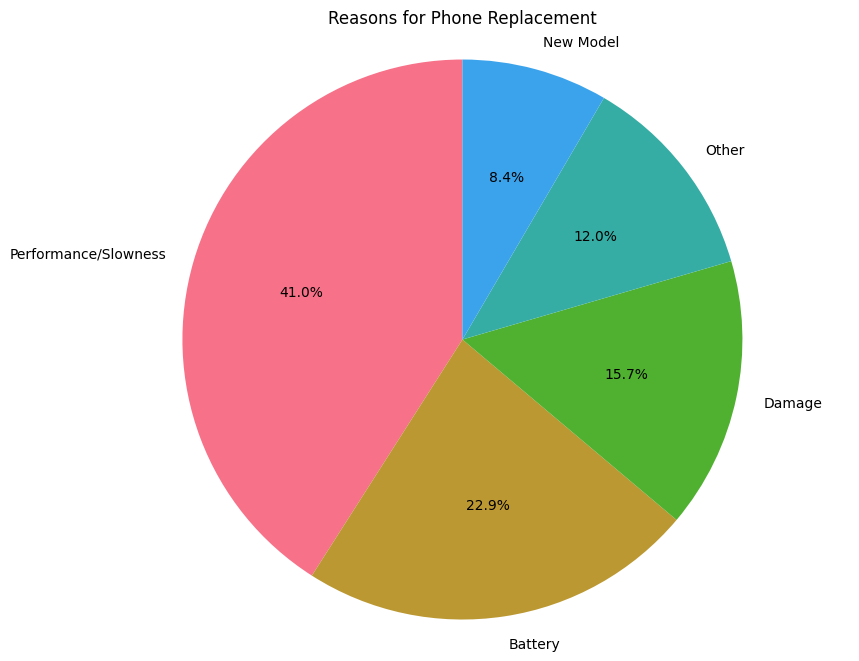

Reasons for replacement:
Performance/Slowness    34
Battery                 19
Damage                  13
Other                   10
New Model                7
Name: count, dtype: int64


In [9]:
# Reasons for replacement
plt.figure(figsize=(10, 8))
reason_col = [col for col in df.columns if 'zakaj' in col.lower() and 'namen' in col.lower() or 'why' in col.lower() and 'plan' in col.lower()][0]
reason_data = df[reason_col].dropna()

# Categorize reasons
replacement_reasons = {
    'Performance/Slowness': ['počas', 'slow', 'outdated', 'zastarel'],
    'Battery': ['baterij', 'battery'],
    'Damage': ['poškod', 'damage', 'pokvaril'],
    'New Model': ['novejš', 'newer model', 'želim nov'],
    'Other': []  # Catch-all
}

reason_categories = []
for reason in reason_data:
    reason_str = str(reason).lower()
    categorized = False
    for category, keywords in replacement_reasons.items():
        if any(keyword in reason_str for keyword in keywords):
            reason_categories.append(category)
            categorized = True
            break
    if not categorized:
        reason_categories.append('Other')

reason_counts = pd.Series(reason_categories).value_counts()
plt.pie(reason_counts.values, labels=reason_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Reasons for Phone Replacement')
plt.axis('equal')
plt.show()

print("Reasons for replacement:")
print(reason_counts)

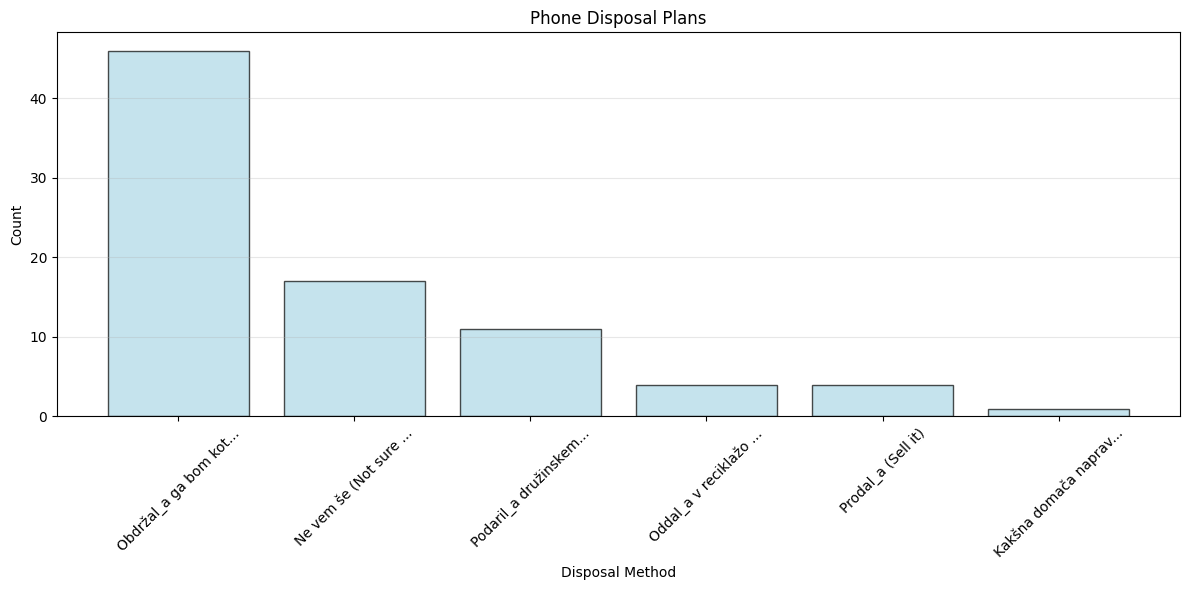

Disposal plans:
Kam ga boste dali po zamenjavi? (What will you do with it after replacement?)
Obdržal_a ga bom kot rezervni telefon (Keep it as a backup phone)               46
Ne vem še (Not sure yet)                                                        17
Podaril_a družinskemu članu / prijatelju (Give it to a family member/friend)    11
Oddal_a v reciklažo / zbirni center (Recycle / take to collection center)        4
Prodal_a (Sell it)                                                               4
Kakšna domača naprava, mogoče imessage server ali kamera ipd                     1
Name: count, dtype: int64


In [10]:
# Phone disposal plans
plt.figure(figsize=(12, 6))
disposal_col = [col for col in df.columns if 'kam ga bosten' in col.lower() or 'what will you do' in col.lower()][0]
disposal_data = df[disposal_col].dropna()
disposal_counts = disposal_data.value_counts().head(6)

plt.bar(range(len(disposal_counts)), disposal_counts.values, color='lightblue', edgecolor='black', alpha=0.7)
plt.title('Phone Disposal Plans')
plt.xlabel('Disposal Method')
plt.ylabel('Count')
plt.xticks(range(len(disposal_counts)), [str(x)[:20] + '...' if len(str(x)) > 20 else str(x) for x in disposal_counts.index], rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("Disposal plans:")
print(disposal_counts)

In [11]:
# Additional detailed analysis
print("\n" + "="*50)
print("DETAILED STATISTICS")
print("="*50)

# Brand popularity by faculty
print("\nTop Brands by Faculty:")
faculty_brand_data = []
for idx, row in df.iterrows():
    faculty = None
    brand = None
    
    # Get faculty
    for col in faculty_cols:
        if pd.notna(row[col]) and row[col] != '':
            faculty = row[col]
            break
    
    # Get brand
    for col in brand_cols:
        if pd.notna(row[col]) and row[col] != '' and row[col] != 'Drugo (Other)':
            brand = row[col]
            break
    
    if faculty and brand:
        faculty_brand_data.append({'faculty': faculty, 'brand': brand})

faculty_brand_df = pd.DataFrame(faculty_brand_data)
if not faculty_brand_df.empty:
    top_faculty_brands = faculty_brand_df.groupby('faculty')['brand'].agg(lambda x: x.value_counts().index[0] if len(x) > 0 else 'None')
    print(top_faculty_brands.head())
else:
    print("No faculty-brand data found")

# Replacement timeline analysis
replacement_timeline = {
    'Immediate (within 6 months)': ['6 mesecih', '6 months', 'naslednjih 6'],
    'Short term (within 1 year)': ['naslednjem letu', 'next year'],
    'Medium term (1-3 years)': ['2 leti', '3 leta', '2 years', '3 years'],
    'Long term (3+ years)': ['4 leta', '5 leta', '4 years', '5 years'],
    'No plans': ['nimam namena', "don't plan", 'dokler deluje']
}

timeline_categories = []
for plan in replace_data:
    plan_str = str(plan).lower()
    for category, keywords in replacement_timeline.items():
        if any(keyword in plan_str for keyword in keywords):
            timeline_categories.append(category)
            break
    else:
        timeline_categories.append('Other')

timeline_counts = pd.Series(timeline_categories).value_counts()
print("\nReplacement Timeline Categories:")
print(timeline_counts)


DETAILED STATISTICS

Top Brands by Faculty:
faculty
Fakulteta za elektrotehniko (Faculty of Electrical Engineering) UL                                                         Apple
Fakulteta za elektrotehniko, računalništvo in informatiko (Faculty of Electrical Engineering and Computer Science) UM    Samsung
Fakulteta za matematiko in fiziko (Faculty of Mathematics and Physics)                                                   Samsung
Fakulteta za matematiko in fiziko (Faculty of Mathematics and Physics) UL                                                Samsung
Fakulteta za računalništvo in informatiko (Faculty of Computer and Information Science)                                    Apple
Name: brand, dtype: object

Replacement Timeline Categories:
No plans                       54
Medium term (1-3 years)        14
Short term (within 1 year)      7
Immediate (within 6 months)     5
Long term (3+ years)            5
Name: count, dtype: int64


In [12]:
# Display written answers for manual analysis
print("\n" + "="*50)
print("WRITTEN ANSWERS FOR MANUAL ANALYSIS")
print("="*50)
print(f"Total written answers collected: {len(written_answers)}")

if written_answers:
    print("\nSample of written answers:")
    for i, answer in enumerate(written_answers[:5]):  # Show first 5
        print(f"\n--- Answer {i+1} ---")
        print(f"Column: {answer['column']}")
        print(f"Answer: {answer['answer'][:200]}...")  # First 200 characters
    
    # Save written answers to file for further analysis
    written_df = pd.DataFrame(written_answers)
    written_df.to_csv('written_answers_analysis.csv', index=False, encoding='utf-8')
    print(f"\nAll written answers saved to 'written_answers_analysis.csv'")
else:
    print("No substantial written answers found.")


WRITTEN ANSWERS FOR MANUAL ANALYSIS
Total written answers collected: 400

Sample of written answers:

--- Answer 1 ---
Column: Na kateri fakulteti študirate? (At which faculty do you study?)
Answer: Fakulteta za matematiko in fiziko (Faculty of Mathematics and Physics)...

--- Answer 2 ---
Column: Kateri študijski program obiskujete? (Which study program are you enrolled in?).2
Answer: Univerzitetni študijski program FIZIKA (University Study Program PHYSICS)...

--- Answer 3 ---
Column: Kam ga boste dali po zamenjavi? (What will you do with it after replacement?)
Answer: Obdržal_a ga bom kot rezervni telefon (Keep it as a backup phone)...

--- Answer 4 ---
Column: Kam ste prejšnji telefon dali/odvrgli? (What did you do with your previous phone?)
Answer: Obdržal_a kot rezervni telefon (Kept it as a backup phone)...

--- Answer 5 ---
Column: Na kateri fakulteti študirate? (At which faculty do you study?)
Answer: Fakulteta za matematiko in fiziko (Faculty of Mathematics and Physics)...



In [13]:
# Create a summary statistics table
print("\n" + "="*50)
print("SUMMARY STATISTICS")
print("="*50)

summary_stats = {
    'Total Respondents': len(df),
    'Average Age': f"{np.mean(age_numeric):.1f} years",
    'Most Common Brand': brand_counts.index[0] if len(brand_counts) > 0 else 'N/A',
    'Most Common Price Range': price_counts.index[0] if len(price_counts) > 0 else 'N/A',
    'Most Common Replacement Plan': replace_counts.index[0] if len(replace_counts) > 0 else 'N/A',
    'Phones to be Kept as Backup': disposal_counts.get('Obdržal_a ga bom kot rezervni telefon (Keep it as a backup phone)', 0)
}

for stat, value in summary_stats.items():
    print(f"{stat}: {value}")

print("\nAnalysis complete!")


SUMMARY STATISTICS
Total Respondents: 87
Average Age: 22.1 years
Most Common Brand: Samsung
Most Common Price Range: 200–400 € (€200–400)
Most Common Replacement Plan: Nimam namena ga zamenjati, dokler deluje (I don’t plan to replace it as long as it works)
Phones to be Kept as Backup: 46

Analysis complete!


In [ ]:
import pandas as pd
import numpy as np
import re
from datetime import datetime

# Load the data
df = pd.read_csv('survey.csv')

print("Original dataset shape:", df.shape)
print("Original columns:", df.columns.tolist())

# Create a clean, structured dataframe
def create_clean_dataframe(df):
    """
    Process the raw survey data into a clean, structured DataFrame
    """
    clean_data = []
    
    for idx, row in df.iterrows():
        record = {}
        
        # Basic info
        record['timestamp'] = row['Časovni žig'] if 'Časovni žig' in row else None
        record['age'] = process_age(row['Koliko ste stari?\nHow old are you?'])
        
        # Demographic data
        record['faculty'] = get_faculty(row)
        record['study_program'] = get_study_program(row)
        record['study_year'] = get_study_year(row)
        
        # Phone information
        record['phone_brand'] = get_phone_brand(row)
        record['phone_model'] = get_phone_model(row)
        record['phone_price'] = get_phone_price(row)
        record['purchase_year'] = get_purchase_year(row)
        record['phone_age'] = 2025 - record['purchase_year'] if record['purchase_year'] else None
        
        # Replacement plans
        record['replacement_plan'] = get_replacement_plan(row)
        record['replacement_reason'] = get_replacement_reason(row)
        record['disposal_plan'] = get_disposal_plan(row)
        
        # Previous phone
        record['prev_phone_replacement_reason'] = get_prev_replacement_reason(row)
        record['prev_phone_disposal'] = get_prev_disposal(row)
        
        # Additional info
        record['additional_info'] = get_additional_info(row)
        
        clean_data.append(record)
    
    return pd.DataFrame(clean_data)

# Processing functions
def process_age(age_value):
    """Extract age as integer"""
    if pd.isna(age_value):
        return None
    try:
        if str(age_value).endswith('+'):
            return 26
        return int(age_value)
    except:
        return None

def get_faculty(row):
    """Extract and standardize faculty"""
    faculty_cols = [col for col in df.columns if 'fakultet' in col.lower() or 'faculty' in col.lower()]
    for col in faculty_cols:
        if pd.notna(row[col]) and row[col] != '':
            faculty = row[col]
            # Standardize faculty names
            if 'matematiko in fiziko' in faculty.lower():
                return 'FMF UL'
            elif 'elektrotehniko, računalništvo in informatiko' in faculty.lower():
                return 'FERI UM'
            elif 'računalništvo in informatiko' in faculty.lower() and 'elektrotehniko' not in faculty.lower():
                return 'FRI UL'
            elif 'elektrotehniko' in faculty.lower():
                return 'FE UL'
            else:
                return faculty
    return None

def get_study_program(row):
    """Extract study program"""
    program_cols = [col for col in df.columns if 'študijski program' in col.lower() or 'study program' in col.lower()]
    for col in program_cols:
        if pd.notna(row[col]) and row[col] != '':
            return row[col]
    return None

def get_study_year(row):
    """Extract study year"""
    year_cols = [col for col in df.columns if 'letnik' in col.lower() or 'year' in col.lower()]
    for col in year_cols:
        if pd.notna(row[col]) and row[col] != '' and 'letnik' in str(row[col]).lower():
            return row[col]
    return None

def get_phone_brand(row):
    """Extract phone brand"""
    brand_cols = [col for col in df.columns if 'znamk' in col.lower() or 'brand' in col.lower()]
    for col in brand_cols:
        if pd.notna(row[col]) and row[col] != '' and row[col] != 'Drugo (Other)':
            return row[col]
    return None

def get_phone_model(row):
    """Extract phone model"""
    model_cols = [col for col in df.columns if 'model' in col.lower() and 'študijski' not in col.lower()]
    for col in model_cols:
        if pd.notna(row[col]) and row[col] != '':
            return row[col]
    return None

def get_phone_price(row):
    """Extract phone price range"""
    price_cols = [col for col in df.columns if 'cen' in col.lower() or 'price' in col.lower()]
    for col in price_cols:
        if pd.notna(row[col]) and row[col] != '':
            return row[col]
    return None

def get_purchase_year(row):
    """Extract purchase year"""
    purchase_cols = [col for col in df.columns if 'kupili' in col.lower() or 'bought' in col.lower()]
    for col in purchase_cols:
        if pd.notna(row[col]) and row[col] != '':
            text = str(row[col])
            # Extract year from patterns like "Pred 4 leti (2021)"
            year_match = re.search(r'\((\d{4})\)', text)
            if year_match:
                return int(year_match.group(1))
            elif 'Letos' in text or 'This year' in text:
                return 2025
            elif 'Lani' in text or 'Last year' in text:
                return 2024
            elif 'Pred več kot 5 leti' in text or 'More than 5 years ago' in text:
                return 2019
    return None

def get_replacement_plan(row):
    """Extract replacement plan"""
    replace_cols = [col for col in df.columns if 'namen zamenjati' in col.lower() or 'plan to replace' in col.lower()]
    for col in replace_cols:
        if pd.notna(row[col]) and row[col] != '':
            return row[col]
    return None

def get_replacement_reason(row):
    """Extract replacement reason"""
    reason_cols = [col for col in df.columns if 'zakaj' in col.lower() and 'namen' in col.lower() or 'why' in col.lower() and 'plan' in col.lower()]
    for col in reason_cols:
        if pd.notna(row[col]) and row[col] != '':
            return row[col]
    return None

def get_disposal_plan(row):
    """Extract disposal plan"""
    disposal_cols = [col for col in df.columns if 'kam ga boste' in col.lower() or 'what will you do' in col.lower()]
    for col in disposal_cols:
        if pd.notna(row[col]) and row[col] != '':
            return row[col]
    return None

def get_prev_replacement_reason(row):
    """Extract previous phone replacement reason"""
    prev_reason_cols = [col for col in df.columns if 'zakaj ste zamenjali' in col.lower() or 'why did you replace' in col.lower()]
    for col in prev_reason_cols:
        if pd.notna(row[col]) and row[col] != '':
            return row[col]
    return None

def get_prev_disposal(row):
    """Extract previous phone disposal method"""
    prev_disposal_cols = [col for col in df.columns if 'kam ste prejšnji' in col.lower() or 'what did you do with your previous' in col.lower()]
    for col in prev_disposal_cols:
        if pd.notna(row[col]) and row[col] != '':
            return row[col]
    return None

def get_additional_info(row):
    """Extract additional information"""
    info_cols = [col for col in df.columns if 'dodatne informacije' in col.lower() or 'additional information' in col.lower()]
    for col in info_cols:
        if pd.notna(row[col]) and row[col] != '' and row[col] != '/':
            return row[col]
    return None

# Create the clean dataframe
print("Processing data...")
clean_df = create_clean_dataframe(df)

print("\n" + "="*60)
print("CLEAN DATAFRAME CREATED SUCCESSFULLY!")
print("="*60)

print(f"Clean dataset shape: {clean_df.shape}")
print(f"Clean columns: {clean_df.columns.tolist()}")

# Display basic info about the clean dataframe
print("\n" + "="*60)
print("DATAFRAME OVERVIEW")
print("="*60)
print(clean_df.info())

print("\n" + "="*60)
print("SAMPLE DATA (first 5 rows)")
print("="*60)
print(clean_df.head())

print("\n" + "="*60)
print("BASIC STATISTICS")
print("="*60)
print(f"Total respondents: {len(clean_df)}")
print(f"Age range: {clean_df['age'].min()} - {clean_df['age'].max()} years")
print(f"Average age: {clean_df['age'].mean():.1f} years")
print(f"Number of faculties: {clean_df['faculty'].nunique()}")
print(f"Number of phone brands: {clean_df['phone_brand'].nunique()}")
print(f"Phone age range: {clean_df['phone_age'].min()} - {clean_df['phone_age'].max()} years")

# Save to CSV for later use
clean_df.to_csv('smartphone_survey_clean.csv', index=False, encoding='utf-8')
print(f"\nClean data saved to 'smartphone_survey_clean.csv'")

# Show value counts for key categorical variables
print("\n" + "="*60)
print("VALUE COUNTS FOR KEY VARIABLES")
print("="*60)

key_columns = ['faculty', 'phone_brand', 'phone_price', 'replacement_plan', 'disposal_plan']
for col in key_columns:
    print(f"\n{col}:")
    print(clean_df[col].value_counts().head(10))

Original dataset shape: (87, 22)
Original columns: ['Časovni žig', 'Koliko ste stari?\nHow old are you?', 'Na kateri fakulteti študirate? (At which faculty do you study?)', 'Kateri študijski program obiskujete? (Which study program are you enrolled in?)', 'Kateri letnik ste? (Which year of study are you in?)', 'Kateri študijski program obiskujete? (Which study program are you enrolled in?).1', 'Kateri letnik ste? (Which year of study are you in?).1', 'Kateri študijski program obiskujete? (Which study program are you enrolled in?).2', 'Kateri letnik ste? (Which year of study are you in?).2', 'Kateri študijski program obiskujete? (Which study program are you enrolled in?).3', 'Kateri letnik ste? (Which year of study are you in?).3', 'Katere znamke telefon imate? (What brand of phone do you have?)', 'Vnesite znamko telefona. (Enter your phone brand.)', 'Kateri model telefona imate? (What model of phone do you have?)', 'Kolikšna je bila cena telefona ob nakupu? (What was the price of the p

In [25]:
import pandas as pd
import numpy as np
import re
from datetime import datetime

# Load the data
df = pd.read_csv('survey.csv')

print("Original dataset shape:", df.shape)
print("Original columns:", df.columns.tolist())

# Create a clean, structured dataframe with English answers only
def create_clean_dataframe(df):
    """
    Process the raw survey data into a clean, structured DataFrame with English answers only
    """
    clean_data = []
    
    for idx, row in df.iterrows():
        record = {}
        
        # Basic info
        record['timestamp'] = row['Časovni žig'] if 'Časovni žig' in row else None
        record['age'] = process_age(row['Koliko ste stari?\nHow old are you?'])
        
        # Demographic data
        record['faculty'] = get_faculty_english(row)
        record['study_program'] = get_study_program_english(row)
        record['study_year'] = get_study_year_english(row)
        
        # Phone information
        record['phone_brand'] = get_phone_brand_english(row)
        record['phone_model'] = get_phone_model(row)  # Models are usually in English
        record['phone_price'] = get_phone_price_english(row)
        record['purchase_year'] = get_purchase_year(row)
        record['phone_age'] = 2025 - record['purchase_year'] if record['purchase_year'] else None
        
        # Replacement plans
        record['replacement_plan'] = get_replacement_plan_english(row)
        record['replacement_reason'] = get_replacement_reason_english(row)
        record['disposal_plan'] = get_disposal_plan_english(row)
        
        # Previous phone
        record['prev_phone_replacement_reason'] = get_prev_replacement_reason_english(row)
        record['prev_phone_disposal'] = get_prev_disposal_english(row)
        
        # Additional info (keep as is since it's free text)
        record['additional_info'] = get_additional_info(row)
        
        clean_data.append(record)
    
    return pd.DataFrame(clean_data)

# Processing functions
def process_age(age_value):
    """Extract age as integer"""
    if pd.isna(age_value):
        return None
    try:
        if str(age_value).endswith('+'):
            return 26
        return int(age_value)
    except:
        return None

def extract_english_part(text):
    """Extract English part from bilingual text (Slovene/English)"""
    if pd.isna(text) or text == '':
        return None
    
    text_str = str(text)
    
    # If text contains parentheses with English translation
    if '(' in text_str and ')' in text_str:
        # Look for content after last opening parenthesis
        matches = re.findall(r'\(([^)]+)\)', text_str)
        if matches:
            # Return the last parenthesized content (usually English)
            return matches[-1].strip()
    
    # If no parentheses, return as is (might already be English)
    return text_str.strip()

def get_faculty_english(row):
    """Extract and standardize faculty in English"""
    faculty_cols = [col for col in df.columns if 'fakultet' in col.lower() or 'faculty' in col.lower()]
    for col in faculty_cols:
        if pd.notna(row[col]) and row[col] != '':
            faculty = row[col]
            # Extract English part and standardize
            english_faculty = extract_english_part(faculty)
            
            if english_faculty:
                # Standardize faculty names in English
                if 'Mathematics and Physics' in english_faculty:
                    return 'Faculty of Mathematics and Physics'
                elif 'Electrical Engineering and Computer Science' in english_faculty:
                    return 'Faculty of Electrical Engineering and Computer Science'
                elif 'Computer and Information Science' in english_faculty:
                    return 'Faculty of Computer and Information Science'
                elif 'Electrical Engineering' in english_faculty:
                    return 'Faculty of Electrical Engineering'
                else:
                    return english_faculty
    return None

def get_study_program_english(row):
    """Extract study program in English"""
    program_cols = [col for col in df.columns if 'študijski program' in col.lower() or 'study program' in col.lower()]
    for col in program_cols:
        if pd.notna(row[col]) and row[col] != '':
            return extract_english_part(row[col])
    return None

def get_study_year_english(row):
    """Extract study year in English"""
    year_cols = [col for col in df.columns if 'letnik' in col.lower() or 'year' in col.lower()]
    for col in year_cols:
        if pd.notna(row[col]) and row[col] != '' and 'letnik' in str(row[col]).lower():
            return extract_english_part(row[col])
    return None

def get_phone_brand_english(row):
    """Extract phone brand (already in English usually)"""
    brand_cols = [col for col in df.columns if 'znamk' in col.lower() or 'brand' in col.lower()]
    for col in brand_cols:
        if pd.notna(row[col]) and row[col] != '' and row[col] != 'Drugo (Other)':
            brand = row[col]
            # Extract English part if it's bilingual
            english_brand = extract_english_part(brand)
            return english_brand if english_brand else brand
    return None

def get_phone_model(row):
    """Extract phone model (usually in English)"""
    model_cols = [col for col in df.columns if 'model' in col.lower() and 'študijski' not in col.lower()]
    for col in model_cols:
        if pd.notna(row[col]) and row[col] != '':
            return row[col]  # Phone models are usually in English
    return None

def get_phone_price_english(row):
    """Extract phone price range in English"""
    price_cols = [col for col in df.columns if 'cen' in col.lower() or 'price' in col.lower()]
    for col in price_cols:
        if pd.notna(row[col]) and row[col] != '':
            return extract_english_part(row[col])
    return None

def get_purchase_year(row):
    """Extract purchase year"""
    purchase_cols = [col for col in df.columns if 'kupili' in col.lower() or 'bought' in col.lower()]
    for col in purchase_cols:
        if pd.notna(row[col]) and row[col] != '':
            text = str(row[col])
            # Extract year from patterns like "Pred 4 leti (2021)"
            year_match = re.search(r'\((\d{4})\)', text)
            if year_match:
                return int(year_match.group(1))
            elif 'Letos' in text or 'This year' in text:
                return 2025
            elif 'Lani' in text or 'Last year' in text:
                return 2024
            elif 'Pred več kot 5 leti' in text or 'More than 5 years ago' in text:
                return 2019
    return None

def get_replacement_plan_english(row):
    """Extract replacement plan in English"""
    replace_cols = [col for col in df.columns if 'namen zamenjati' in col.lower() or 'plan to replace' in col.lower()]
    for col in replace_cols:
        if pd.notna(row[col]) and row[col] != '':
            return extract_english_part(row[col])
    return None

def get_replacement_reason_english(row):
    """Extract replacement reason in English"""
    reason_cols = [col for col in df.columns if 'zakaj' in col.lower() and 'namen' in col.lower() or 'why' in col.lower() and 'plan' in col.lower()]
    for col in reason_cols:
        if pd.notna(row[col]) and row[col] != '':
            reason = row[col]
            # For free-text reasons, try to categorize in English
            english_reason = extract_english_part(reason)
            if english_reason:
                return english_reason
            else:
                # Translate common Slovene reasons to English
                reason_lower = reason.lower()
                if 'počas' in reason_lower or 'zastarel' in reason_lower:
                    return 'Slow performance / outdated'
                elif 'baterij' in reason_lower:
                    return 'Poor battery'
                elif 'poškod' in reason_lower or 'pokvaril' in reason_lower:
                    return 'Damage'
                elif 'novejš' in reason_lower or 'želim nov' in reason_lower:
                    return 'Want newer model'
                else:
                    return reason  # Keep original if no clear translation
    return None

def get_disposal_plan_english(row):
    """Extract disposal plan in English"""
    disposal_cols = [col for col in df.columns if 'kam ga boste' in col.lower() or 'what will you do' in col.lower()]
    for col in disposal_cols:
        if pd.notna(row[col]) and row[col] != '':
            return extract_english_part(row[col])
    return None

def get_prev_replacement_reason_english(row):
    """Extract previous phone replacement reason in English"""
    prev_reason_cols = [col for col in df.columns if 'zakaj ste zamenjali' in col.lower() or 'why did you replace' in col.lower()]
    for col in prev_reason_cols:
        if pd.notna(row[col]) and row[col] != '':
            reason = row[col]
            english_reason = extract_english_part(reason)
            if english_reason:
                return english_reason
            else:
                # Translate common Slovene reasons
                reason_lower = reason.lower()
                if 'počas' in reason_lower or 'zastarel' in reason_lower:
                    return 'Slow performance / outdated'
                elif 'baterij' in reason_lower:
                    return 'Poor battery'
                elif 'poškod' in reason_lower or 'pokvaril' in reason_lower:
                    return 'Damage'
                elif 'novejš' in reason_lower:
                    return 'Wanted newer model'
                elif 'operater' in reason_lower:
                    return 'Operator offer'
                else:
                    return reason
    return None

def get_prev_disposal_english(row):
    """Extract previous phone disposal method in English"""
    prev_disposal_cols = [col for col in df.columns if 'kam ste prejšnji' in col.lower() or 'what did you do with your previous' in col.lower()]
    for col in prev_disposal_cols:
        if pd.notna(row[col]) and row[col] != '':
            return extract_english_part(row[col])
    return None

def get_additional_info(row):
    """Extract additional information (keep as is)"""
    info_cols = [col for col in df.columns if 'dodatne informacije' in col.lower() or 'additional information' in col.lower()]
    for col in info_cols:
        if pd.notna(row[col]) and row[col] != '' and row[col] != '/':
            return row[col]
    return None

# Create the clean dataframe
print("Processing data...")
clean_df = create_clean_dataframe(df)

print("\n" + "="*60)
print("CLEAN DATAFRAME CREATED SUCCESSFULLY!")
print("="*60)

print(f"Clean dataset shape: {clean_df.shape}")
print(f"Clean columns: {clean_df.columns.tolist()}")

# Display basic info about the clean dataframe
print("\n" + "="*60)
print("DATAFRAME OVERVIEW")
print("="*60)
print(clean_df.info())

print("\n" + "="*60)
print("SAMPLE DATA (first 5 rows)")
print("="*60)
print(clean_df.head())

print("\n" + "="*60)
print("BASIC STATISTICS")
print("="*60)
print(f"Total respondents: {len(clean_df)}")
print(f"Age range: {clean_df['age'].min()} - {clean_df['age'].max()} years")
print(f"Average age: {clean_df['age'].mean():.1f} years")
print(f"Number of faculties: {clean_df['faculty'].nunique()}")
print(f"Number of phone brands: {clean_df['phone_brand'].nunique()}")
print(f"Phone age range: {clean_df['phone_age'].min()} - {clean_df['phone_age'].max()} years")

# Save to CSV for later use
clean_df.to_csv('smartphone_survey_clean_english.csv', index=False, encoding='utf-8')
print(f"\nClean data saved to 'smartphone_survey_clean_english.csv'")

# Show value counts for key categorical variables
print("\n" + "="*60)
print("VALUE COUNTS FOR KEY VARIABLES (ENGLISH)")
print("="*60)

key_columns = ['faculty', 'phone_brand', 'phone_price', 'replacement_plan', 'disposal_plan']
for col in key_columns:
    print(f"\n{col}:")
    print(clean_df[col].value_counts().head(10))

# Show examples of English translations
print("\n" + "="*60)
print("EXAMPLES OF ENGLISH TRANSLATIONS")
print("="*60)
sample_cols = ['faculty', 'study_year', 'phone_price', 'replacement_plan', 'disposal_plan']
for col in sample_cols:
    if col in clean_df.columns:
        print(f"\n{col} examples:")
        print(clean_df[col].value_counts().head(3))

Original dataset shape: (87, 22)
Original columns: ['Časovni žig', 'Koliko ste stari?\nHow old are you?', 'Na kateri fakulteti študirate? (At which faculty do you study?)', 'Kateri študijski program obiskujete? (Which study program are you enrolled in?)', 'Kateri letnik ste? (Which year of study are you in?)', 'Kateri študijski program obiskujete? (Which study program are you enrolled in?).1', 'Kateri letnik ste? (Which year of study are you in?).1', 'Kateri študijski program obiskujete? (Which study program are you enrolled in?).2', 'Kateri letnik ste? (Which year of study are you in?).2', 'Kateri študijski program obiskujete? (Which study program are you enrolled in?).3', 'Kateri letnik ste? (Which year of study are you in?).3', 'Katere znamke telefon imate? (What brand of phone do you have?)', 'Vnesite znamko telefona. (Enter your phone brand.)', 'Kateri model telefona imate? (What model of phone do you have?)', 'Kolikšna je bila cena telefona ob nakupu? (What was the price of the p

Phone brands by faculty:
phone_brand                                         Apple  Cubot  Google  \
faculty                                                                    
Faculty of Computer and Information Science             7      0       3   
Faculty of Electrical Engineering                       2      0       0   
Faculty of Electrical Engineering and Computer ...      4      0       2   
Faculty of Mathematics and Physics                      9      1       1   

phone_brand                                         Honor  Huawei  Motorola  \
faculty                                                                       
Faculty of Computer and Information Science             0       0         1   
Faculty of Electrical Engineering                       0       0         0   
Faculty of Electrical Engineering and Computer ...      0       0         0   
Faculty of Mathematics and Physics                      1       1         0   

phone_brand                                

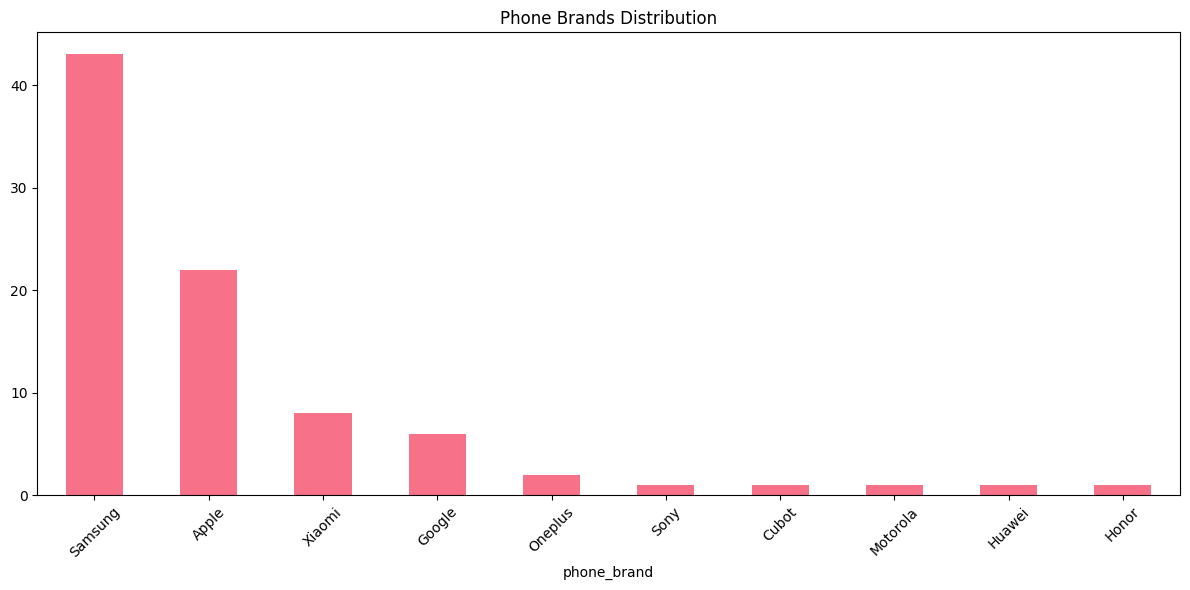

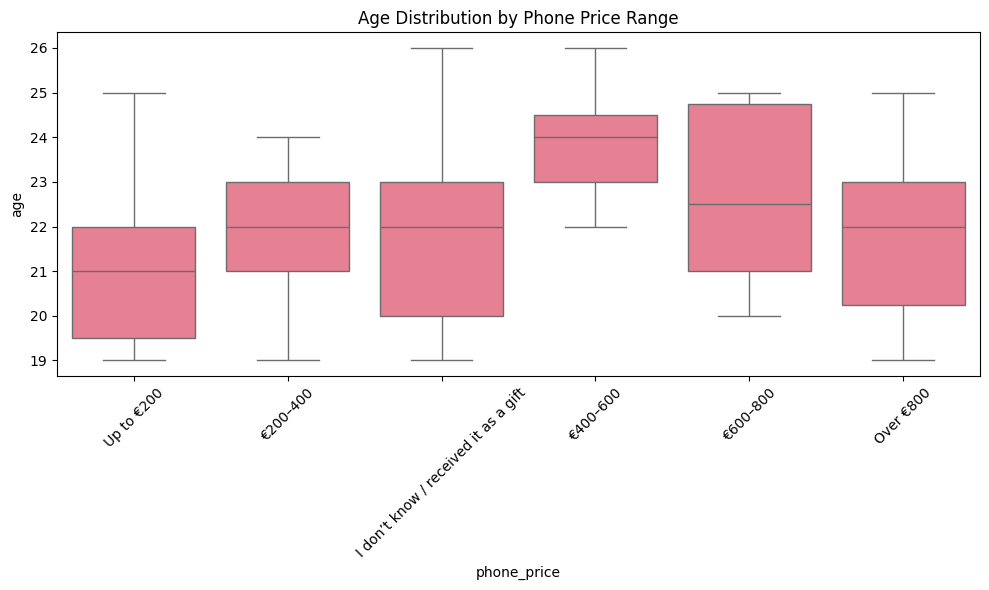

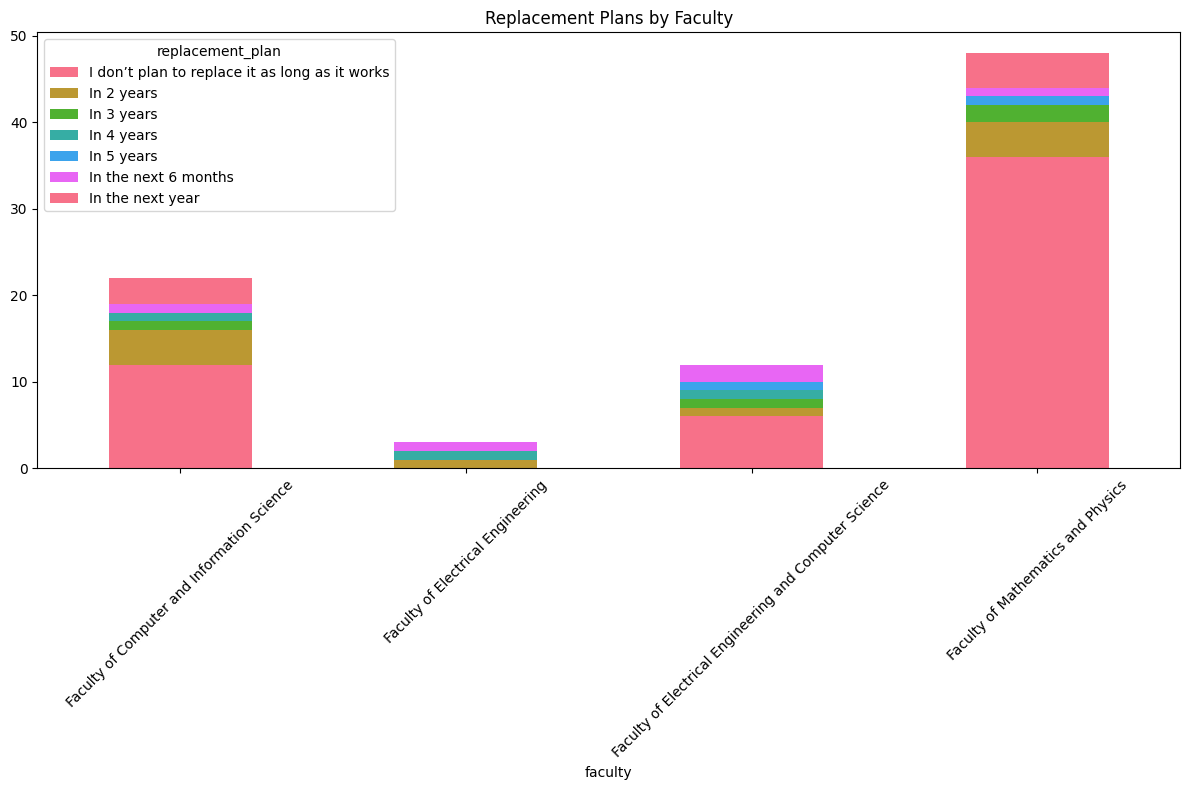

In [26]:
# EXAMPLE ANALYSES YOU CAN NOW EASILY DO:

# 1. Phone brands by faculty
brand_by_faculty = clean_df.groupby(['faculty', 'phone_brand']).size().unstack(fill_value=0)
print("Phone brands by faculty:")
print(brand_by_faculty)

# 2. Age distribution by phone brand
age_by_brand = clean_df.groupby('phone_brand')['age'].agg(['mean', 'count', 'std'])
print("\nAge statistics by phone brand:")
print(age_by_brand)

# 3. Replacement plans by phone age
replacement_by_age = clean_df.groupby('phone_age')['replacement_plan'].value_counts().unstack(fill_value=0)
print("\nReplacement plans by phone age:")
print(replacement_by_age)

# 4. Price distribution by faculty
price_by_faculty = clean_df.groupby(['faculty', 'phone_price']).size().unstack(fill_value=0)
print("\nPrice distribution by faculty:")
print(price_by_faculty)

# 5. Quick visualization examples
import matplotlib.pyplot as plt
import seaborn as sns

# Example 1: Phone brands distribution
plt.figure(figsize=(12, 6))
clean_df['phone_brand'].value_counts().plot(kind='bar')
plt.title('Phone Brands Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Example 2: Age vs Phone price
plt.figure(figsize=(10, 6))
sns.boxplot(data=clean_df, x='phone_price', y='age')
plt.title('Age Distribution by Phone Price Range')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Example 3: Faculty vs Replacement plans
faculty_replacement = clean_df.groupby(['faculty', 'replacement_plan']).size().unstack()
faculty_replacement.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Replacement Plans by Faculty')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. Phone brand preference by faculty vs study year
phone_brand                                                               Apple  \
faculty                                            study_year                     
Faculty of Computer and Information Science        1st year                 1.0   
                                                   1st year postgraduate    1.0   
                                                   2nd year                 1.0   
                                                   2nd year postgraduate    3.0   
                                                   3rd year                 1.0   
Faculty of Electrical Engineering                  1st year                 1.0   
                                                   2nd year                 1.0   
                                                   3rd year                 0.0   
Faculty of Electrical Engineering and Computer ... 2nd year postgraduate    4.0   
                                    

<Figure size 1400x800 with 0 Axes>

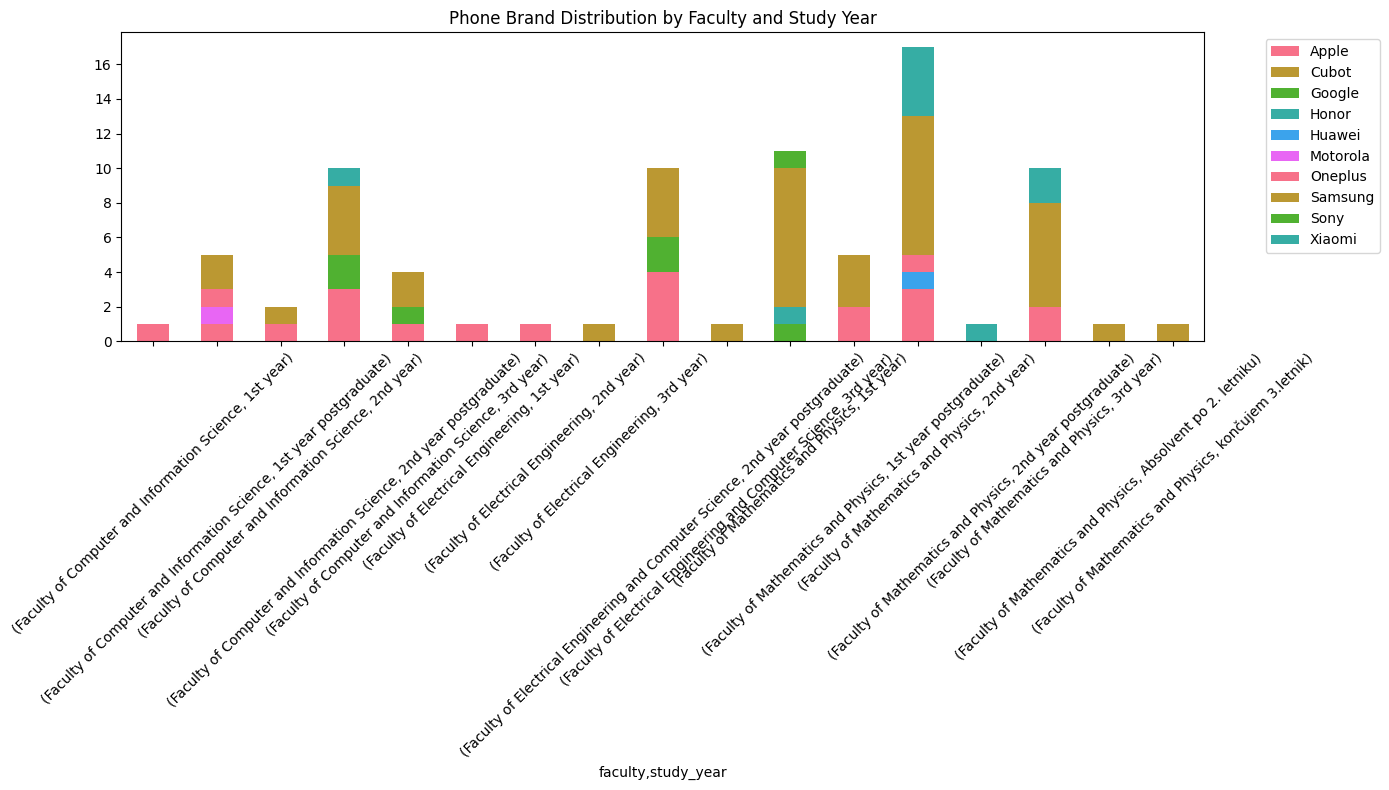


2. Phone age vs replacement reason by price range
                                                                                         mean  \
phone_price                          replacement_reason                                         
I don’t know / received it as a gift Bomo še videli                                       5.0   
                                     Damage                                               3.5   
                                     Glej odgovor zgoraj                                  1.0   
                                     I want a newer model                                 0.0   
                                     Idk                                                  1.0   
                                     Nimam namena                                         2.0   
                                     Poor battery performance                             2.3   
                                     Počasno delovanje ali poškodba         

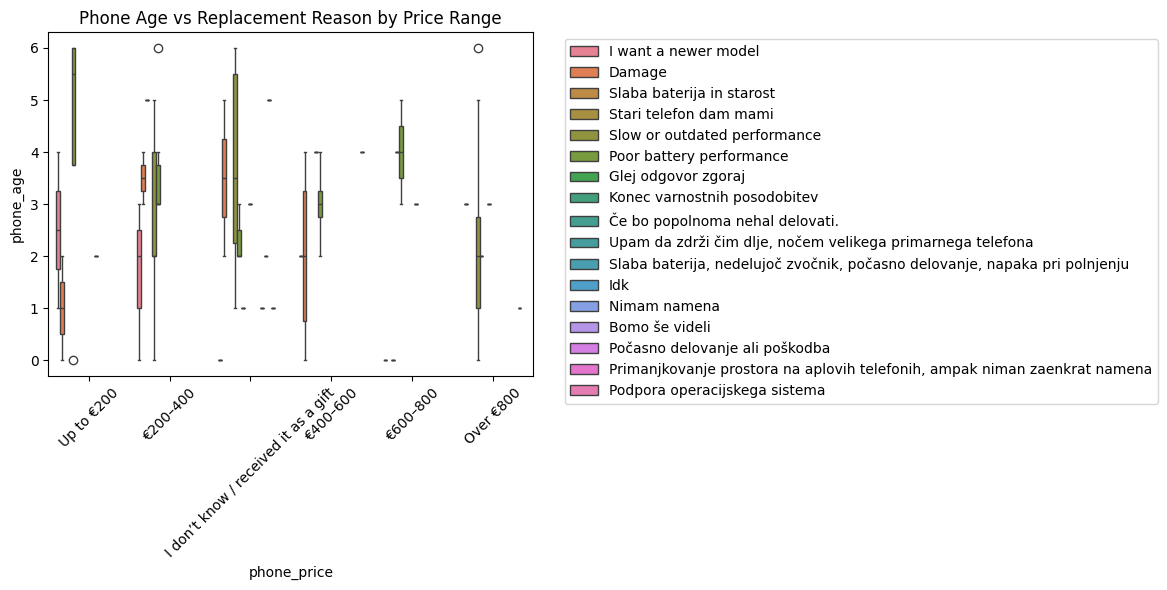


3. Backup vs Recycling behavior by faculty
disposal_plan                                       Give it to a family member/friend  \
faculty                                                                                 
Faculty of Computer and Information Science                                       5.0   
Faculty of Electrical Engineering                                                 1.0   
Faculty of Electrical Engineering and Computer ...                                3.0   
Faculty of Mathematics and Physics                                                2.0   

disposal_plan                                       Kakšna domača naprava, mogoče imessage server ali kamera ipd  \
faculty                                                                                                            
Faculty of Computer and Information Science                                                       0.0              
Faculty of Electrical Engineering                                        

<Figure size 1200x600 with 0 Axes>

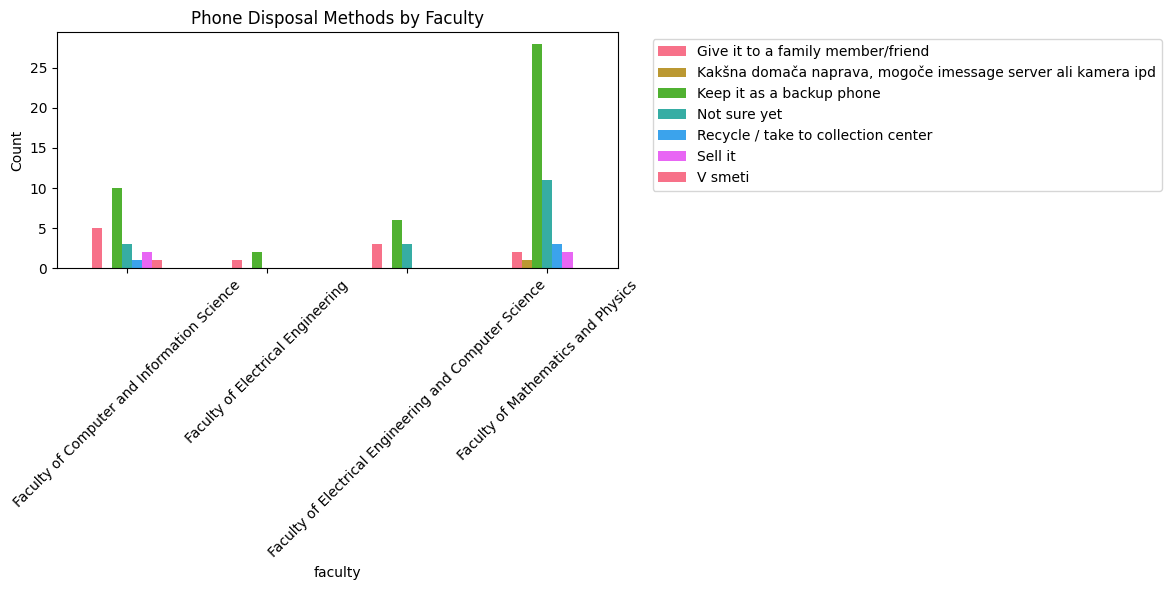


4. Age distribution of iPhone vs Android users by faculty
                                                             mean  count  std
faculty                                            phone_os                  
Faculty of Computer and Information Science        Android   23.4     15  1.7
                                                   iPhone    23.4      7  2.4
Faculty of Electrical Engineering                  Android   21.0      1  NaN
                                                   iPhone    19.5      2  0.7
Faculty of Electrical Engineering and Computer ... Android   23.4      8  0.5
                                                   iPhone    22.5      4  1.0
Faculty of Mathematics and Physics                 Android   21.2     40  1.7
                                                   Other     24.0      1  NaN
                                                   iPhone    21.8      9  1.5


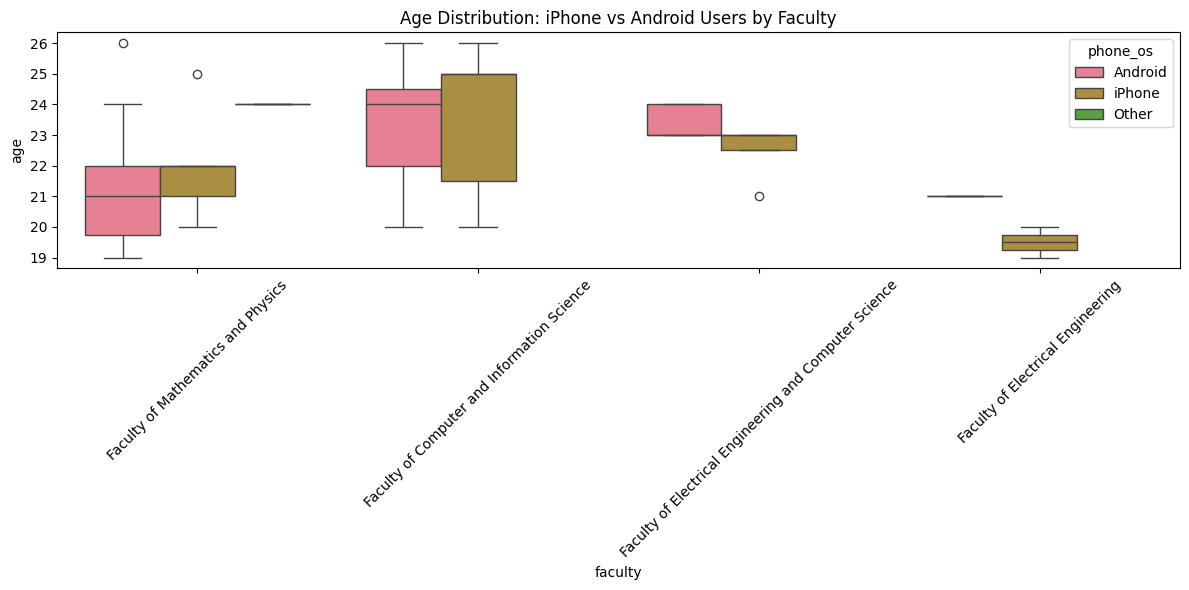


5. Phone price vs replacement timeline
replacement_plan                      I don’t plan to replace it as long as it works  \
phone_price                                                                            
I don’t know / received it as a gift                                            16.0   
Over €800                                                                        8.0   
Up to €200                                                                       8.0   
€200–400                                                                        11.0   
€400–600                                                                         8.0   
€600–800                                                                         3.0   

replacement_plan                      In 2 years  In 3 years  In 4 years  \
phone_price                                                                
I don’t know / received it as a gift         1.0         0.0         0.0   
Over €800                  

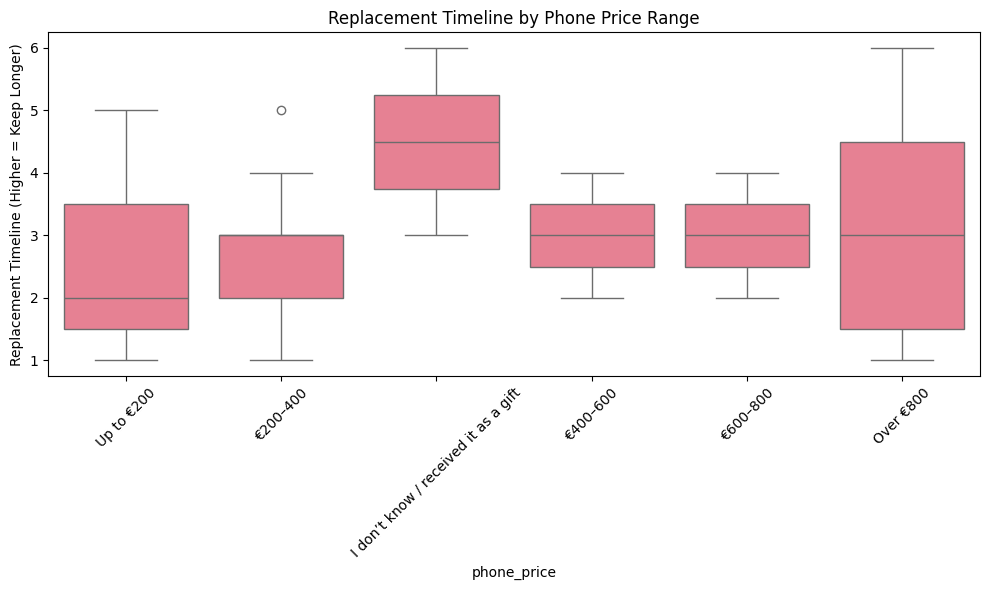


6. Previous vs planned disposal methods
disposal_plan                             Give it to a family member/friend  \
prev_phone_disposal                                                           
Discarded it                                                           11.1   
Gave it away                                                           45.5   
I don’t know                                                            0.0   
Kept it as a backup phone                                               4.3   
Ni obstajal                                                             0.0   
Obdržal kot off-line predvajalnik glasbe                                0.0   
Recycled it                                                            50.0   
Sold it                                                                25.0   
nekam dal, ne vem kam                                                   0.0   
ostal je v škatli                                                       0.0   

disposal_p

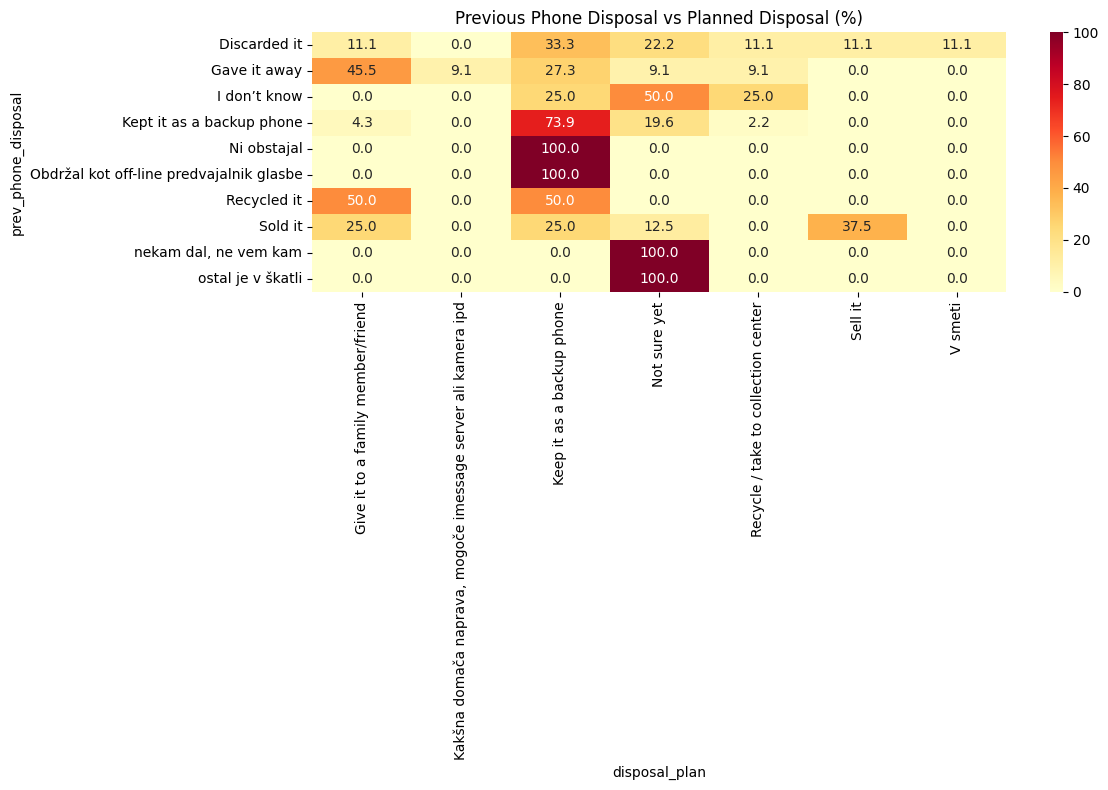


7. Phone brand by study level
phone_brand  Apple  Cubot  Google  Honor  Huawei  Motorola  Oneplus  Samsung  \
study_level                                                                    
Bachelor       9.0    0.0     1.0    0.0     1.0       0.0      1.0     21.0   
Master         1.0    1.0     0.0    0.0     0.0       0.0      0.0      5.0   
Other         11.0    0.0     4.0    1.0     0.0       1.0      1.0     16.0   

phone_brand  Sony  Xiaomi  
study_level                
Bachelor      1.0     5.0  
Master        0.0     1.0  
Other         0.0     1.0  


<Figure size 1200x600 with 0 Axes>

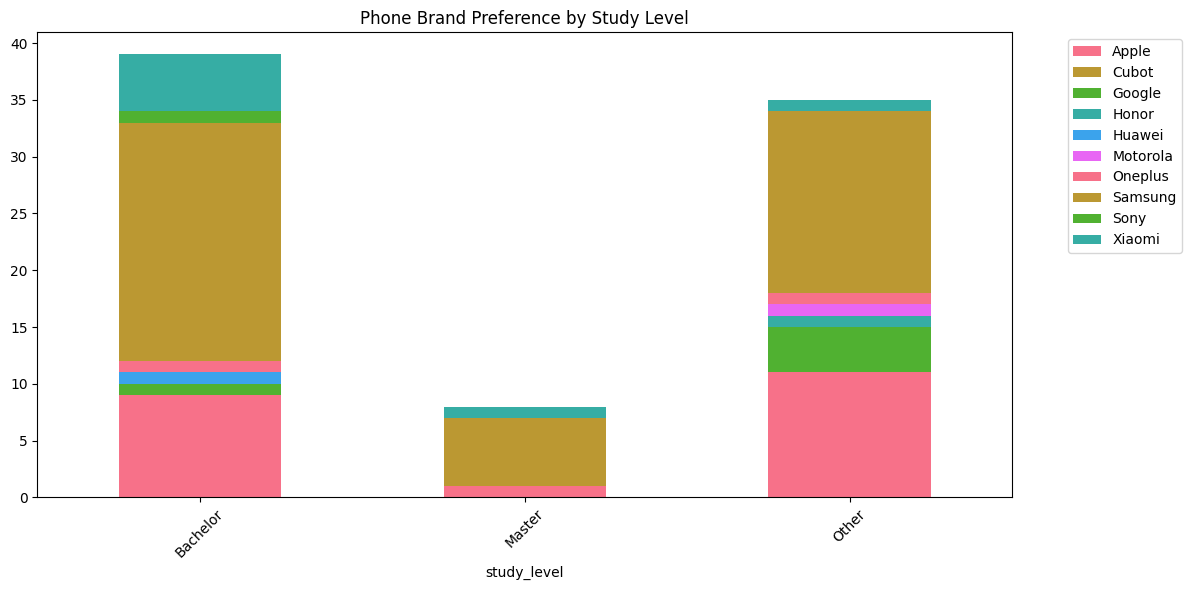


8. Correlation: Respondent age vs Phone age
                age  phone_age
age        1.000000  -0.127582
phone_age -0.127582   1.000000


TypeError: expected x and y to have same length

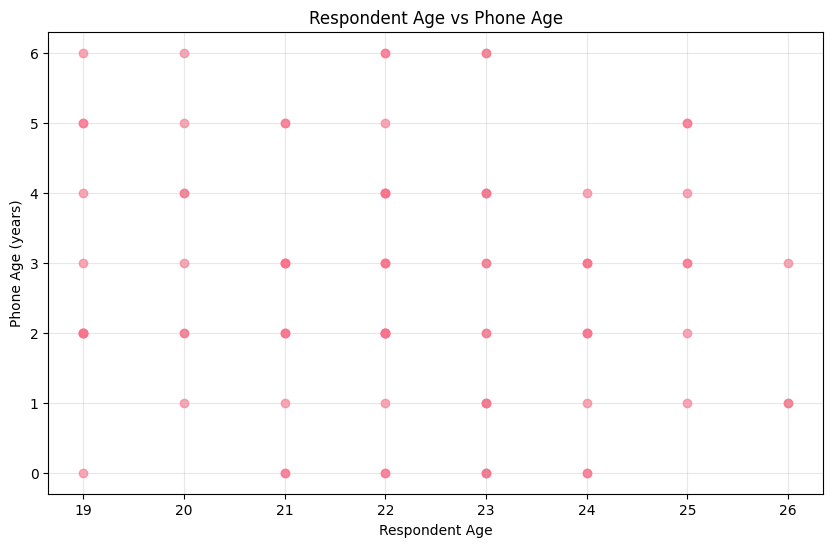

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

# 1. Phone brand preference by faculty vs study year
print("1. Phone brand preference by faculty vs study year")
analysis_1 = clean_df.groupby(['faculty', 'study_year', 'phone_brand']).size().unstack().fillna(0)
print(analysis_1.head(10))

plt.figure(figsize=(14, 8))
faculty_brand_year = clean_df.groupby(['faculty', 'study_year', 'phone_brand']).size().unstack(level=2).fillna(0)
faculty_brand_year.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Phone Brand Distribution by Faculty and Study Year')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2. Phone age vs replacement reason by price range
print("\n2. Phone age vs replacement reason by price range")
analysis_2 = clean_df.groupby(['phone_price', 'replacement_reason'])['phone_age'].agg(['mean', 'count', 'std']).round(1)
print(analysis_2)

plt.figure(figsize=(12, 6))
sns.boxplot(data=clean_df, x='phone_price', y='phone_age', hue='replacement_reason')
plt.title('Phone Age vs Replacement Reason by Price Range')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3. Faculty distribution of people who keep phones as backup vs recycle them
print("\n3. Backup vs Recycling behavior by faculty")
analysis_3 = clean_df[clean_df['disposal_plan'].notna()].groupby(['faculty', 'disposal_plan']).size().unstack().fillna(0)
analysis_3['backup_ratio'] = analysis_3.get('Keep it as a backup phone', 0) / analysis_3.sum(axis=1)
print(analysis_3)

plt.figure(figsize=(12, 6))
disposal_by_faculty = clean_df.groupby(['faculty', 'disposal_plan']).size().unstack()
disposal_by_faculty.plot(kind='bar', figsize=(12, 6))
plt.title('Phone Disposal Methods by Faculty')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 4. Age distribution of iPhone vs Android users by faculty
print("\n4. Age distribution of iPhone vs Android users by faculty")
clean_df['phone_os'] = clean_df['phone_brand'].apply(lambda x: 'iPhone' if x == 'Apple' else 'Android' if pd.notna(x) else 'Other')
analysis_4 = clean_df.groupby(['faculty', 'phone_os'])['age'].agg(['mean', 'count', 'std']).round(1)
print(analysis_4)

plt.figure(figsize=(12, 6))
sns.boxplot(data=clean_df, x='faculty', y='age', hue='phone_os')
plt.title('Age Distribution: iPhone vs Android Users by Faculty')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Relationship between phone price and how long people plan to keep it
print("\n5. Phone price vs replacement timeline")
analysis_5 = clean_df.groupby(['phone_price', 'replacement_plan']).size().unstack().fillna(0)
print(analysis_5)

# Create a timeline score for analysis
replacement_timeline_score = {
    'In the next 6 months': 1,
    'In the next year': 2,
    'In 2 years': 3,
    'In 3 years': 4,
    'In 4 years': 5,
    'In 5 years': 6,
    "I don't plan to replace it as long as it works": 7
}

clean_df['timeline_score'] = clean_df['replacement_plan'].map(replacement_timeline_score)

plt.figure(figsize=(10, 6))
sns.boxplot(data=clean_df, x='phone_price', y='timeline_score')
plt.title('Replacement Timeline by Phone Price Range')
plt.ylabel('Replacement Timeline (Higher = Keep Longer)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. Previous phone disposal method vs current disposal plan
print("\n6. Previous vs planned disposal methods")
analysis_6 = pd.crosstab(clean_df['prev_phone_disposal'], clean_df['disposal_plan'], normalize='index') * 100
print(analysis_6.round(1))

plt.figure(figsize=(12, 8))
sns.heatmap(analysis_6, annot=True, cmap='YlOrRd', fmt='.1f')
plt.title('Previous Phone Disposal vs Planned Disposal (%)')
plt.tight_layout()
plt.show()

# 7. Phone brand popularity by study program type (Bachelor vs Master)
print("\n7. Phone brand by study level")
clean_df['study_level'] = clean_df['study_program'].apply(lambda x: 
    'Master' if 'Master' in str(x) else 
    'Bachelor' if 'University' in str(x) or 'Univerzitetni' in str(x) else 
    'Other' if pd.notna(x) else None)

analysis_7 = clean_df.groupby(['study_level', 'phone_brand']).size().unstack().fillna(0)
print(analysis_7)

plt.figure(figsize=(12, 6))
study_brand = clean_df.groupby(['study_level', 'phone_brand']).size().unstack()
study_brand.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Phone Brand Preference by Study Level')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 8. Correlation between respondent age and phone age
print("\n8. Correlation: Respondent age vs Phone age")
analysis_8 = clean_df[['age', 'phone_age']].corr()
print(analysis_8)

plt.figure(figsize=(10, 6))
plt.scatter(clean_df['age'], clean_df['phone_age'], alpha=0.6)
plt.xlabel('Respondent Age')
plt.ylabel('Phone Age (years)')
plt.title('Respondent Age vs Phone Age')
plt.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(clean_df['age'].dropna(), clean_df['phone_age'].dropna(), 1)
p = np.poly1d(z)
plt.plot(clean_df['age'].dropna(), p(clean_df['age'].dropna()), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

# 9. Replacement reasons by phone operating system and faculty
print("\n9. Replacement reasons by OS and faculty")
analysis_9 = clean_df.groupby(['faculty', 'phone_os', 'replacement_reason']).size().unstack().fillna(0)
print(analysis_9.head(10))

# Pivot for heatmap
pivot_data = clean_df.groupby(['faculty', 'phone_os', 'replacement_reason']).size().unstack(level=2).fillna(0)

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_data, annot=True, cmap='Blues', fmt='.0f')
plt.title('Replacement Reasons by Faculty and Phone OS')
plt.tight_layout()
plt.show()

# 10. Most common phone models for each price range by faculty
print("\n10. Popular phone models by price range and faculty")
analysis_10 = clean_df.groupby(['faculty', 'phone_price', 'phone_model']).size().reset_index(name='count')
# Get top 3 models for each faculty-price combination
top_models = analysis_10.sort_values(['faculty', 'phone_price', 'count'], ascending=[True, True, False])
top_models = top_models.groupby(['faculty', 'phone_price']).head(3)

print("Top phone models by faculty and price range:")
for (faculty, price), group in top_models.groupby(['faculty', 'phone_price']):
    print(f"\n{faculty} - {price}:")
    for _, row in group.iterrows():
        print(f"  {row['phone_model']}: {row['count']} users")

# Bonus: Create a bubble chart of this analysis
plt.figure(figsize=(14, 8))
scatter = plt.scatter(
    x=top_models['faculty'].astype('category').cat.codes,
    y=top_models['phone_price'].astype('category').cat.codes,
    s=top_models['count']*50,
    alpha=0.6,
    c=top_models['count'],
    cmap='viridis'
)

plt.colorbar(scatter, label='Number of Users')
plt.xticks(range(len(clean_df['faculty'].unique())), clean_df['faculty'].unique(), rotation=45)
plt.yticks(range(len(clean_df['phone_price'].unique())), clean_df['phone_price'].unique())
plt.xlabel('Faculty')
plt.ylabel('Phone Price Range')
plt.title('Popular Phone Models by Faculty and Price Range (Bubble Size = User Count)')
plt.tight_layout()
plt.show()

# Extra: Time-based analysis of responses
print("\nExtra: Response pattern throughout the day")
clean_df['response_hour'] = pd.to_datetime(clean_df['timestamp']).dt.hour
hourly_responses = clean_df['response_hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
hourly_responses.plot(kind='bar', color='skyblue')
plt.title('Survey Responses by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Responses')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

11. Age vs Phone Price Range


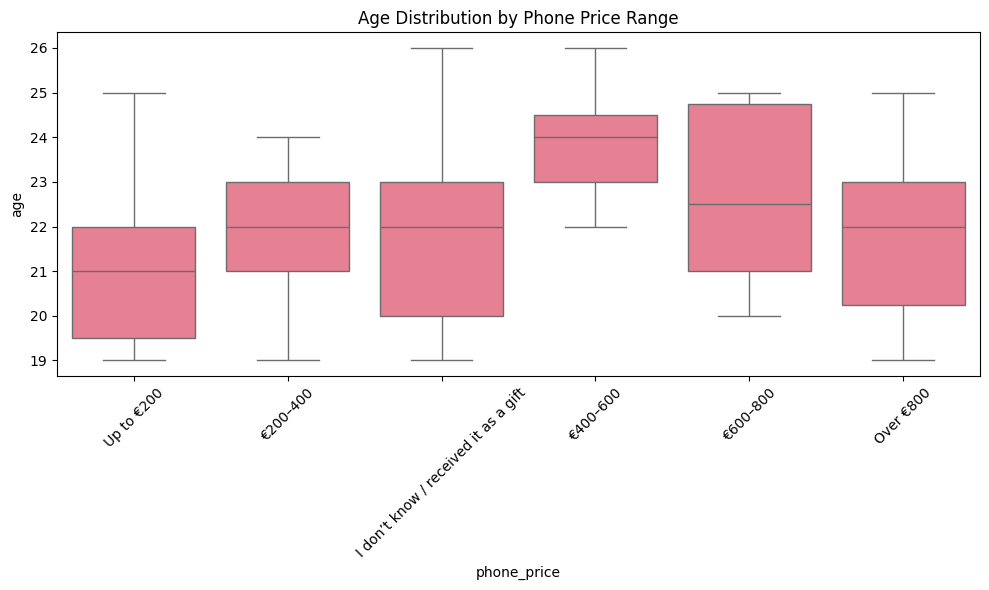


12. Faculty vs Average Phone Age
                                                    mean  count
faculty                                                        
Faculty of Electrical Engineering                    3.0      3
Faculty of Mathematics and Physics                   2.9     48
Faculty of Computer and Information Science          2.7     22
Faculty of Electrical Engineering and Computer ...   1.7     12


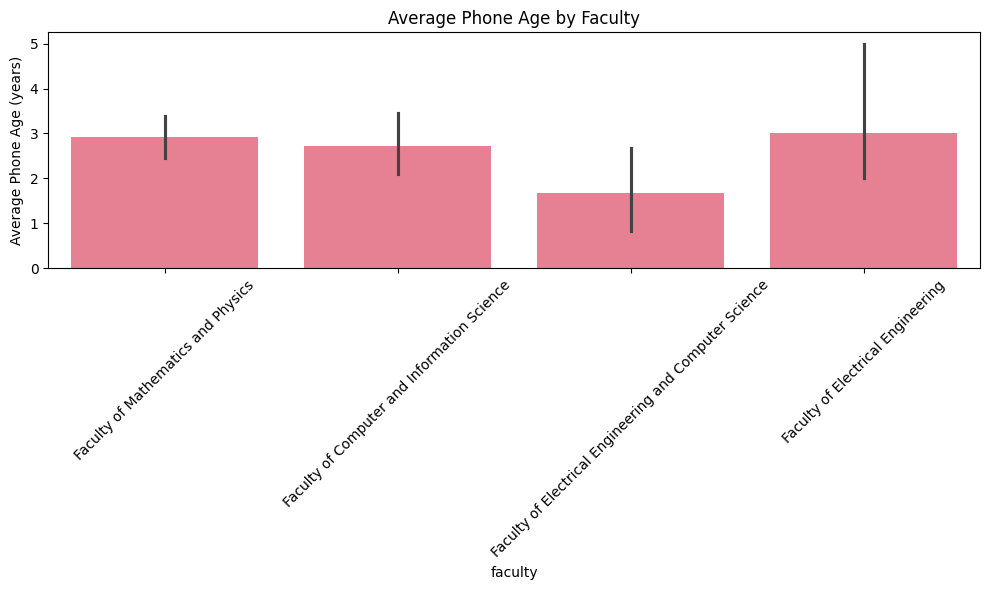


13. Phone Brand vs Replacement Timeline
replacement_plan  I don’t plan to replace it as long as it works  In 2 years  \
phone_brand                                                                    
Apple                                                       59.1         9.1   
Cubot                                                      100.0         0.0   
Google                                                      50.0        16.7   
Honor                                                      100.0         0.0   
Huawei                                                     100.0         0.0   
Motorola                                                     0.0         0.0   
Oneplus                                                     50.0         0.0   
Samsung                                                     64.3        11.9   
Sony                                                       100.0         0.0   
Xiaomi                                                      75.0        25.0   

<Figure size 1200x600 with 0 Axes>

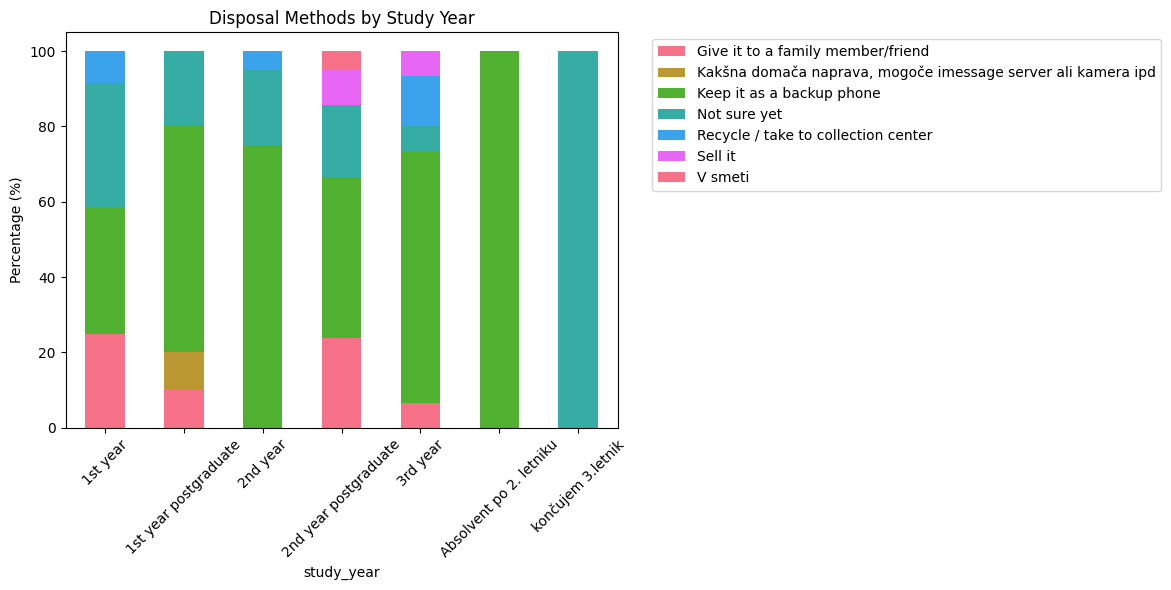


15. Age Group vs Replacement Reason
replacement_reason  Bomo še videli  Damage  Glej odgovor zgoraj  \
age_group                                                         
18-20                          5.6    22.2                  0.0   
21-22                          0.0    16.7                  3.3   
23-24                          0.0    12.0                  0.0   
25+                            0.0    10.0                  0.0   

replacement_reason  I want a newer model  Idk  Konec varnostnih posodobitev  \
age_group                                                                     
18-20                                5.6  0.0                           0.0   
21-22                               10.0  0.0                           3.3   
23-24                               12.0  4.0                           0.0   
25+                                  0.0  0.0                           0.0   

replacement_reason  Nimam namena  Podpora operacijskega sistema  \
age_group         

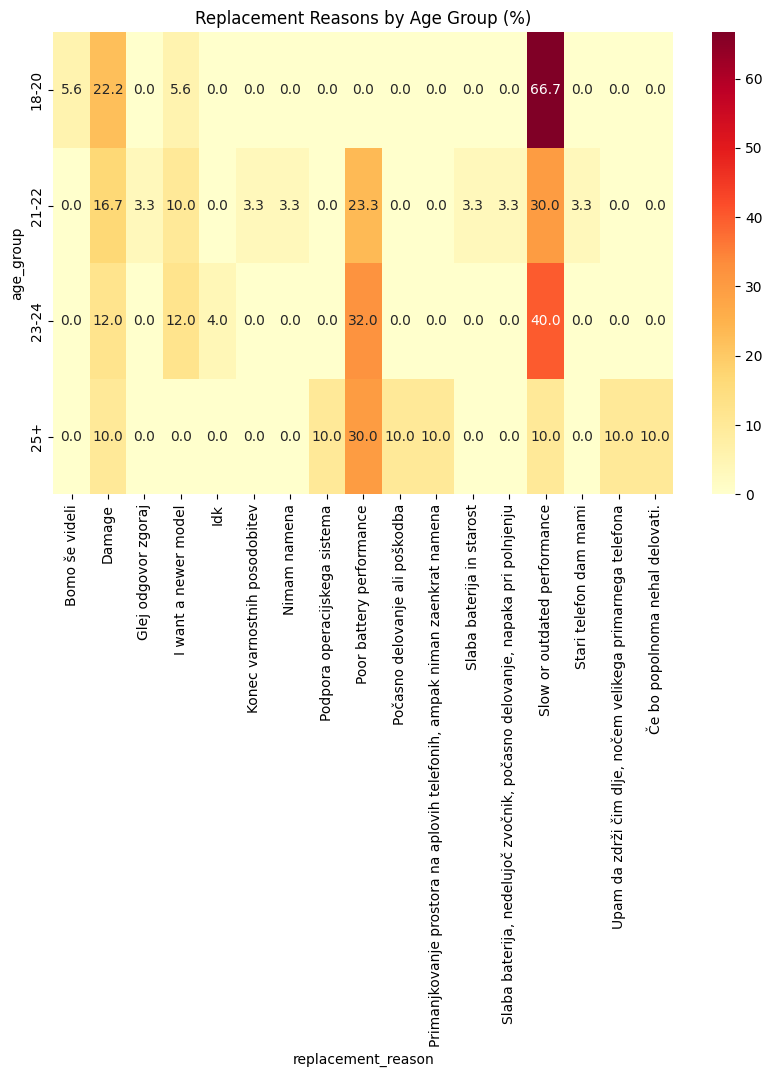


16. Phone Price vs Phone Age


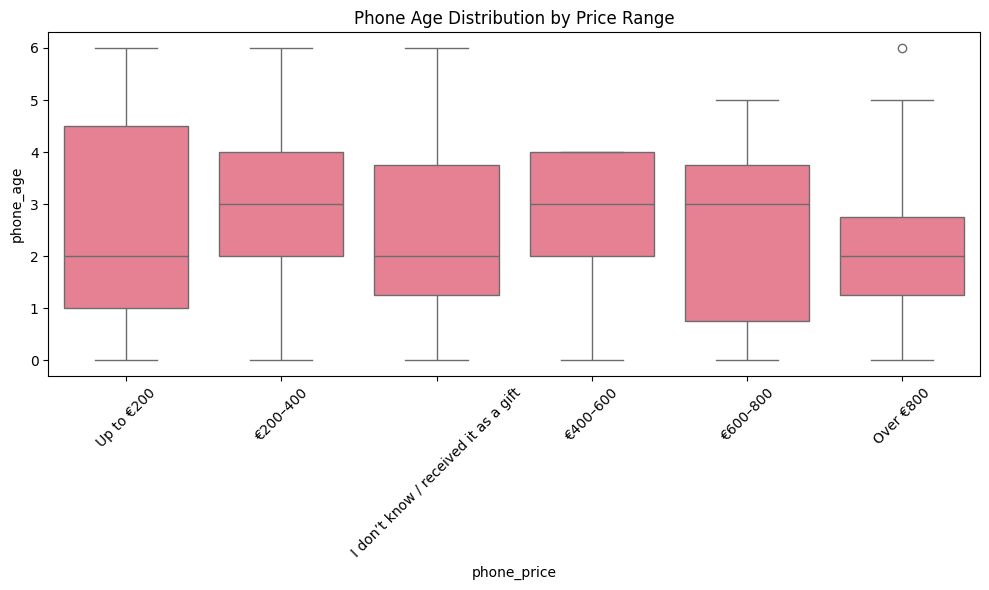

                                      mean  median  count
phone_price                                              
I don’t know / received it as a gift   2.7     2.0     18
Over €800                              2.3     2.0     14
Up to €200                             2.8     2.0     11
€200–400                               2.9     3.0     25
€400–600                               2.7     3.0     11
€600–800                               2.5     3.0      6

17. Faculty vs Most Common Phone Brand
Most popular brand by faculty:
faculty
Faculty of Computer and Information Science               Samsung
Faculty of Electrical Engineering                           Apple
Faculty of Electrical Engineering and Computer Science    Samsung
Faculty of Mathematics and Physics                        Samsung
Name: phone_brand, dtype: object

Brand counts by faculty:
phone_brand                                         Apple  Cubot  Google  \
faculty                                                   

<Figure size 1000x600 with 0 Axes>

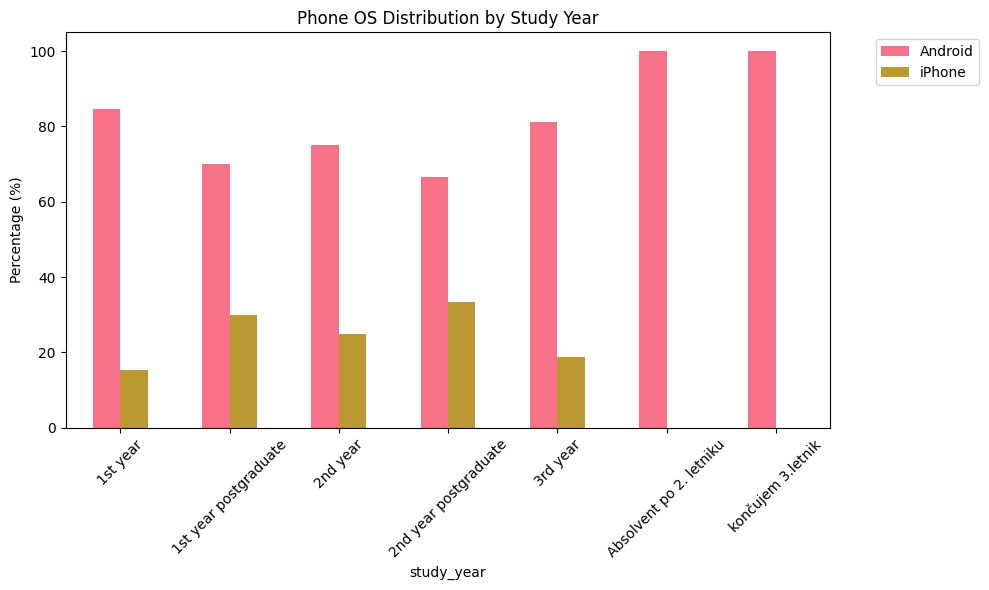


19. Replacement Reason vs Disposal Plan
disposal_plan                                       Give it to a family member/friend  \
replacement_reason                                                                      
Bomo še videli                                                                    0.0   
Damage                                                                            0.0   
Glej odgovor zgoraj                                                               0.0   
I want a newer model                                                             42.9   
Idk                                                                               0.0   
Konec varnostnih posodobitev                                                      0.0   
Nimam namena                                                                      0.0   
Podpora operacijskega sistema                                                     0.0   
Poor battery performance                                             

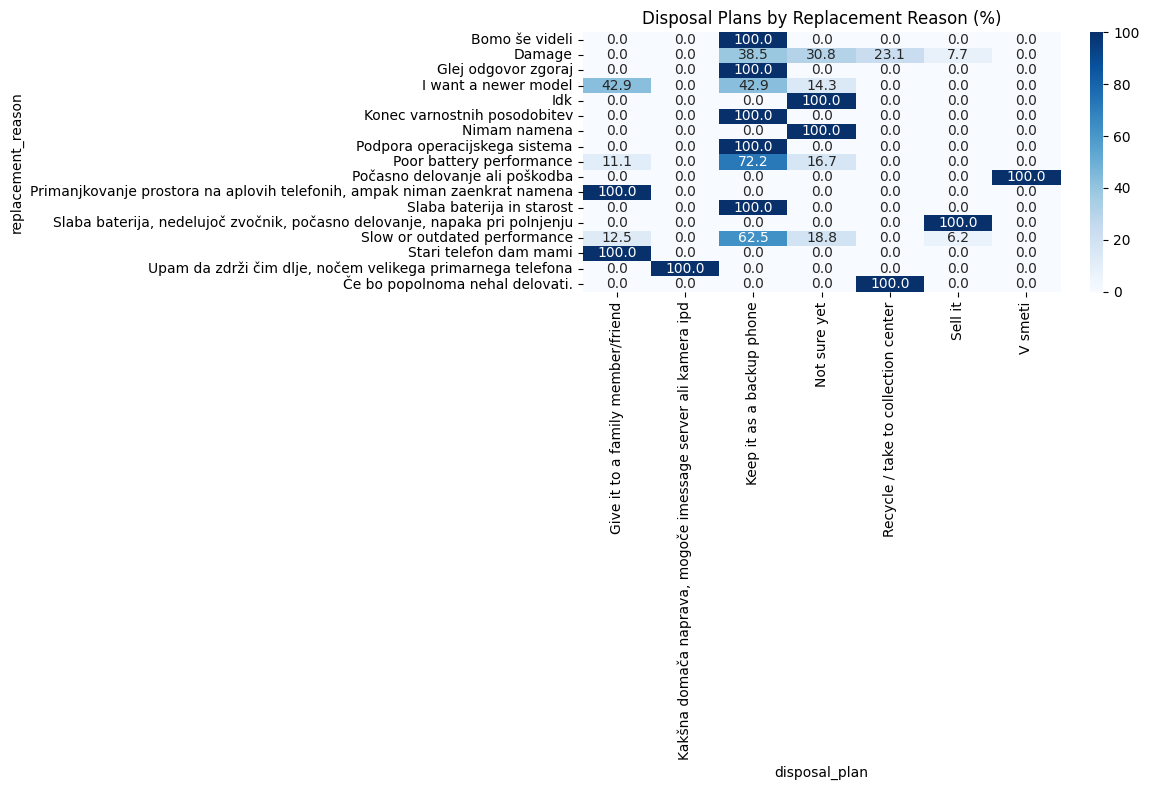


20. Phone Brand vs Previous Phone Disposal
prev_phone_disposal  Discarded it  Gave it away  I don’t know  \
phone_brand                                                     
Apple                        22.7          22.7           0.0   
Cubot                         0.0           0.0           0.0   
Google                       16.7          16.7           0.0   
Honor                         0.0           0.0           0.0   
Huawei                        0.0           0.0           0.0   
Motorola                      0.0           0.0           0.0   
Oneplus                       0.0           0.0           0.0   
Samsung                       7.1           9.5           7.1   
Sony                          0.0         100.0           0.0   
Xiaomi                        0.0           0.0          12.5   

prev_phone_disposal  Kept it as a backup phone  Ni obstajal  \
phone_brand                                                   
Apple                                     40.9   

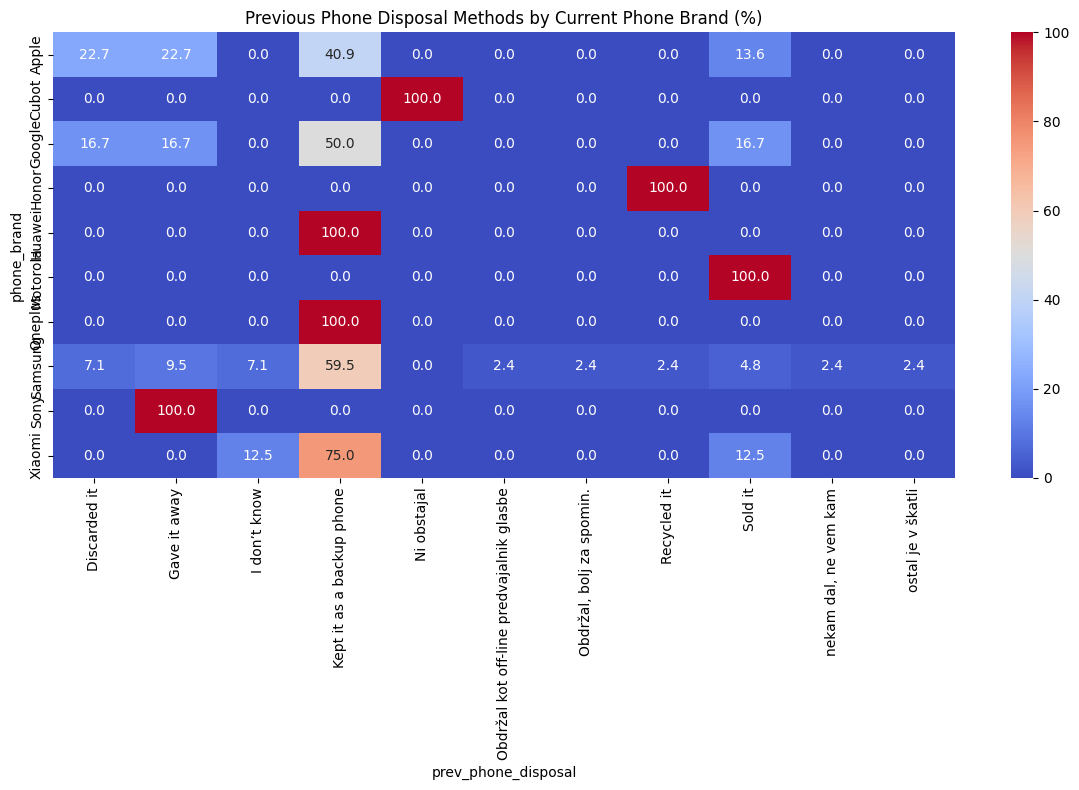

In [31]:
# Create age_group column first
clean_df['age_group'] = pd.cut(clean_df['age'], bins=[18, 20, 22, 24, 30], labels=['18-20', '21-22', '23-24', '25+'])

# Now run the analyses
print("11. Age vs Phone Price Range")
plt.figure(figsize=(10, 6))
sns.boxplot(data=clean_df, x='phone_price', y='age')
plt.title('Age Distribution by Phone Price Range')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 12. Faculty vs Average Phone Age
print("\n12. Faculty vs Average Phone Age")
faculty_avg_age = clean_df.groupby('faculty')['phone_age'].agg(['mean', 'count']).round(1).sort_values('mean', ascending=False)
print(faculty_avg_age)

plt.figure(figsize=(10, 6))
sns.barplot(data=clean_df, x='faculty', y='phone_age', estimator='mean')
plt.title('Average Phone Age by Faculty')
plt.xticks(rotation=45)
plt.ylabel('Average Phone Age (years)')
plt.tight_layout()
plt.show()

# 13. Phone Brand vs Replacement Timeline
print("\n13. Phone Brand vs Replacement Timeline")
brand_timeline = pd.crosstab(clean_df['phone_brand'], clean_df['replacement_plan'], normalize='index') * 100
print(brand_timeline.round(1))

# 14. Study Year vs Disposal Method
print("\n14. Study Year vs Disposal Method")
year_disposal = pd.crosstab(clean_df['study_year'], clean_df['disposal_plan'], normalize='index') * 100
print(year_disposal.round(1))

plt.figure(figsize=(12, 6))
year_disposal.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Disposal Methods by Study Year')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 15. Age Group vs Replacement Reason
print("\n15. Age Group vs Replacement Reason")
age_reason = pd.crosstab(clean_df['age_group'], clean_df['replacement_reason'], normalize='index') * 100
print(age_reason.round(1))

plt.figure(figsize=(10, 6))
sns.heatmap(age_reason, annot=True, cmap='YlOrRd', fmt='.1f')
plt.title('Replacement Reasons by Age Group (%)')
plt.tight_layout()
plt.show()

# 16. Phone Price vs Phone Age
print("\n16. Phone Price vs Phone Age")
plt.figure(figsize=(10, 6))
sns.boxplot(data=clean_df, x='phone_price', y='phone_age')
plt.title('Phone Age Distribution by Price Range')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

price_age_stats = clean_df.groupby('phone_price')['phone_age'].agg(['mean', 'median', 'count']).round(1)
print(price_age_stats)

# 17. Faculty vs Most Common Phone Brand
print("\n17. Faculty vs Most Common Phone Brand")
faculty_top_brand = clean_df.groupby('faculty')['phone_brand'].agg(lambda x: x.value_counts().index[0] if len(x) > 0 else 'None')
faculty_brand_count = clean_df.groupby(['faculty', 'phone_brand']).size().unstack().fillna(0)
print("Most popular brand by faculty:")
print(faculty_top_brand)
print("\nBrand counts by faculty:")
print(faculty_brand_count)

# 18. Study Year vs Phone Operating System
print("\n18. Study Year vs Phone Operating System")
# Create phone_os column if it doesn't exist
if 'phone_os' not in clean_df.columns:
    clean_df['phone_os'] = clean_df['phone_brand'].apply(lambda x: 'iPhone' if x == 'Apple' else 'Android' if pd.notna(x) else 'Other')

year_os = pd.crosstab(clean_df['study_year'], clean_df['phone_os'], normalize='index') * 100
print(year_os.round(1))

plt.figure(figsize=(10, 6))
year_os.plot(kind='bar', figsize=(10, 6))
plt.title('Phone OS Distribution by Study Year')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 19. Replacement Reason vs Disposal Plan
print("\n19. Replacement Reason vs Disposal Plan")
reason_disposal = pd.crosstab(clean_df['replacement_reason'], clean_df['disposal_plan'], normalize='index') * 100
print(reason_disposal.round(1))

plt.figure(figsize=(12, 8))
sns.heatmap(reason_disposal, annot=True, cmap='Blues', fmt='.1f')
plt.title('Disposal Plans by Replacement Reason (%)')
plt.tight_layout()
plt.show()

# 20. Phone Brand vs Previous Phone Disposal
print("\n20. Phone Brand vs Previous Phone Disposal")
brand_prev_disposal = pd.crosstab(clean_df['phone_brand'], clean_df['prev_phone_disposal'], normalize='index') * 100
print(brand_prev_disposal.round(1))

plt.figure(figsize=(12, 8))
sns.heatmap(brand_prev_disposal, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Previous Phone Disposal Methods by Current Phone Brand (%)')
plt.tight_layout()
plt.show()

21. Faculty vs Phone Price Range
phone_price                                         I don’t know / received it as a gift  \
faculty                                                                                    
Faculty of Computer and Information Science                                            5   
Faculty of Electrical Engineering                                                      0   
Faculty of Electrical Engineering and Computer ...                                     1   
Faculty of Mathematics and Physics                                                    12   

phone_price                                         Over €800  Up to €200  \
faculty                                                                     
Faculty of Computer and Information Science                 2           2   
Faculty of Electrical Engineering                           2           0   
Faculty of Electrical Engineering and Computer ...          5           0   
Faculty of Mathematics and Ph

<Figure size 1200x600 with 0 Axes>

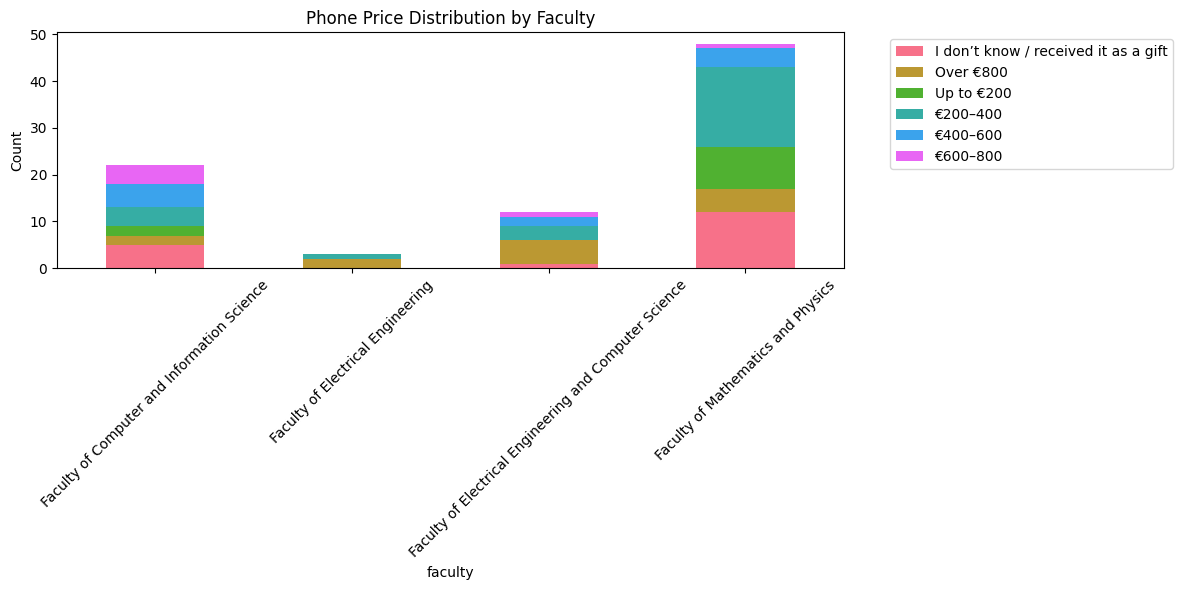


22. Study Year vs Average Age
                         mean  count  std
study_year                               
1st year                 20.0     13  1.9
1st year postgraduate    22.9     10  1.1
2nd year                 21.1     20  1.7
2nd year postgraduate    23.8     21  1.2
3rd year                 22.1     16  1.2
Absolvent po 2. letniku  24.0      1  NaN
končujem 3.letnik        22.0      1  NaN


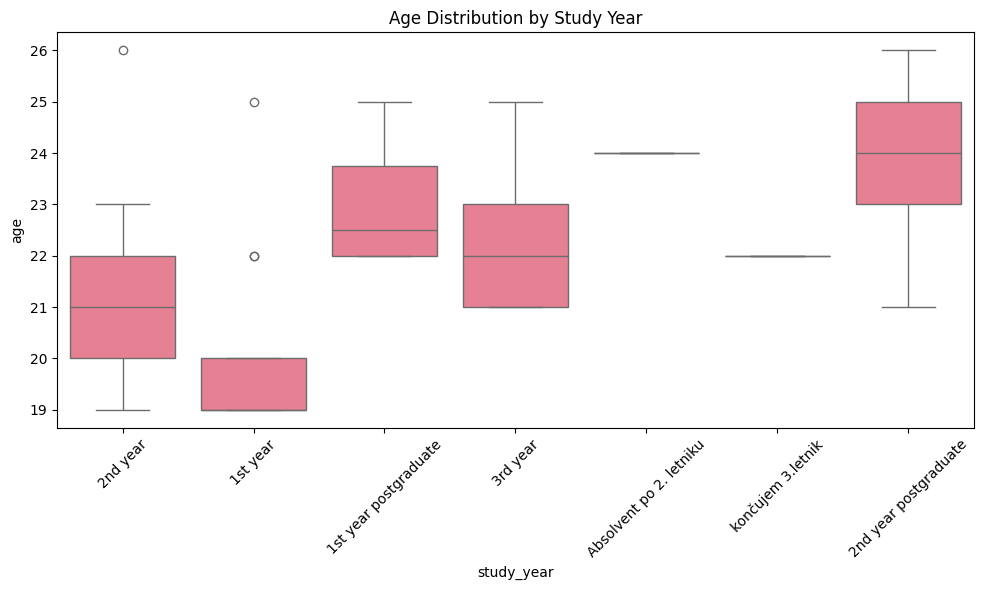


23. Phone Brand vs Phone Age
             mean  count  std
phone_brand                  
Apple         2.7     22  1.8
Cubot         6.0      1  NaN
Google        2.0      6  1.7
Honor         3.0      1  NaN
Huawei        6.0      1  NaN
Motorola      4.0      1  NaN
Oneplus       3.5      2  0.7
Samsung       2.4     42  1.5
Sony          6.0      1  NaN
Xiaomi        3.1      8  2.0


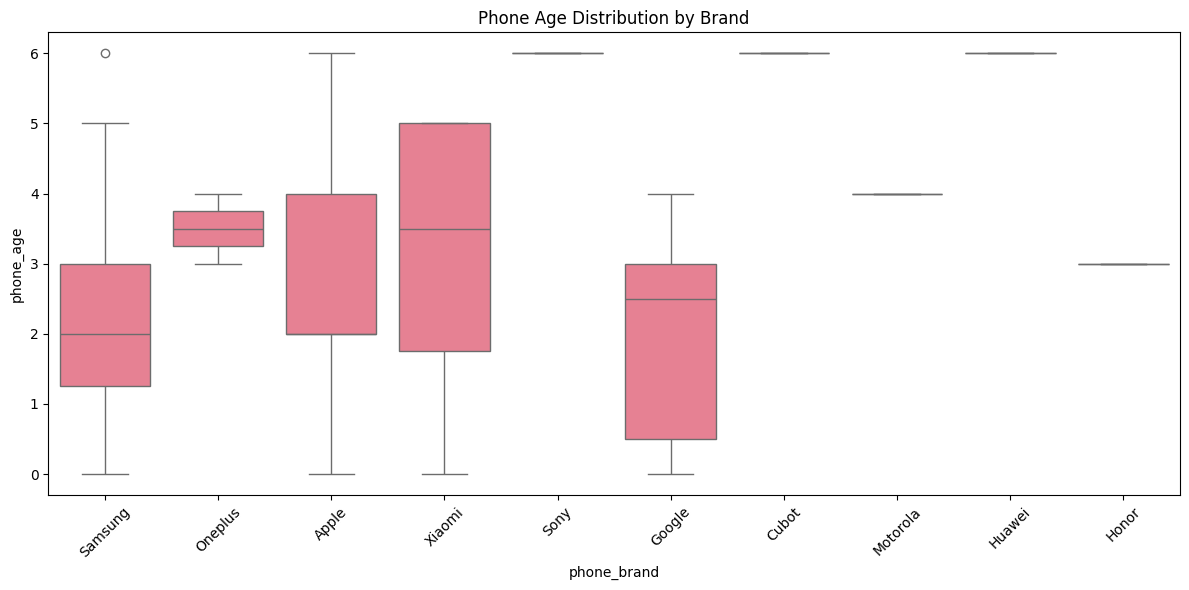


24. Replacement Plan vs Disposal Plan
disposal_plan                                   Give it to a family member/friend  \
replacement_plan                                                                    
I don’t plan to replace it as long as it works                                  3   
In 2 years                                                                      3   
In 3 years                                                                      1   
In 4 years                                                                      2   
In 5 years                                                                      1   
In the next 6 months                                                            0   
In the next year                                                                1   

disposal_plan                                   Kakšna domača naprava, mogoče imessage server ali kamera ipd  \
replacement_plan                                                                   

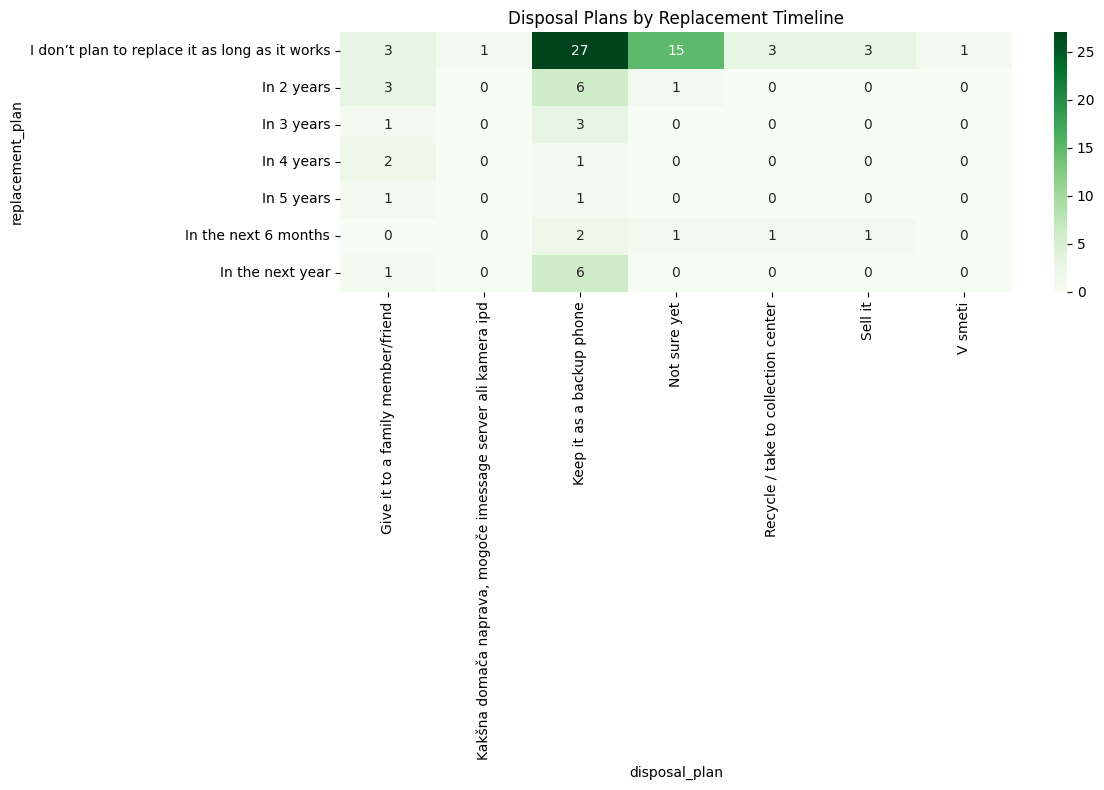


25. Faculty vs Previous Phone Disposal
prev_phone_disposal                                 Discarded it  \
faculty                                                            
Faculty of Computer and Information Science                 13.6   
Faculty of Electrical Engineering                           33.3   
Faculty of Electrical Engineering and Computer ...           8.3   
Faculty of Mathematics and Physics                           8.3   

prev_phone_disposal                                 Gave it away  \
faculty                                                            
Faculty of Computer and Information Science                 13.6   
Faculty of Electrical Engineering                            0.0   
Faculty of Electrical Engineering and Computer ...          33.3   
Faculty of Mathematics and Physics                           8.3   

prev_phone_disposal                                 I don’t know  \
faculty                                                            
Facult

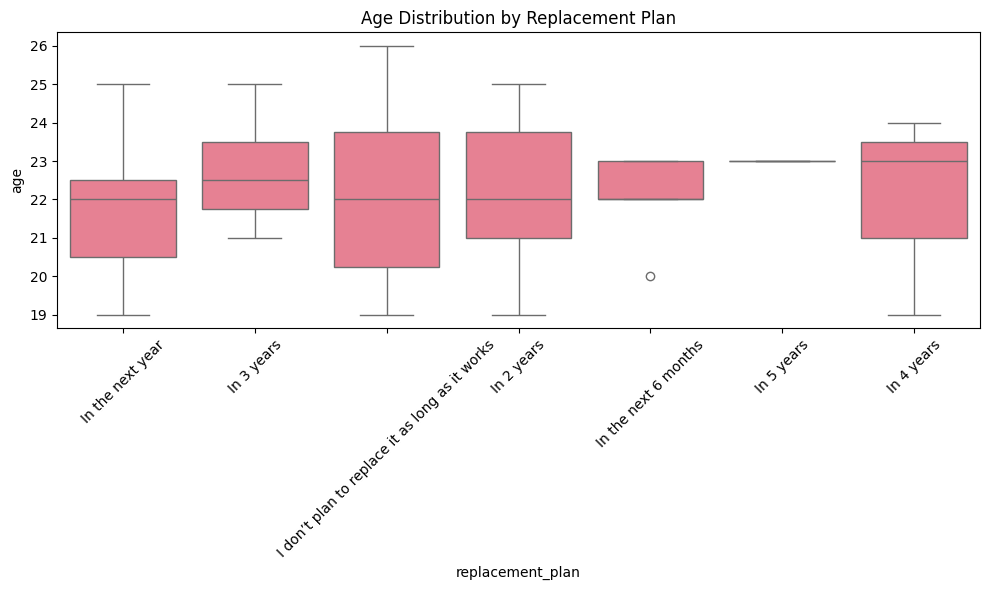


29. Phone Brand vs Study Program Type
study_level  Bachelor  Master  Other
phone_brand                         
Apple               9       1     11
Cubot               0       1      0
Google              1       0      4
Honor               0       0      1
Huawei              1       0      0
Motorola            0       0      1
Oneplus             1       0      1
Samsung            21       5     16
Sony                1       0      0
Xiaomi              5       1      1

30. Faculty vs Average Respondent Age
                                                    mean  count  std
faculty                                                             
Faculty of Computer and Information Science         23.4     22  1.9
Faculty of Electrical Engineering                   20.0      3  1.0
Faculty of Electrical Engineering and Computer ...  23.1     12  0.8
Faculty of Mathematics and Physics                  21.4     50  1.7


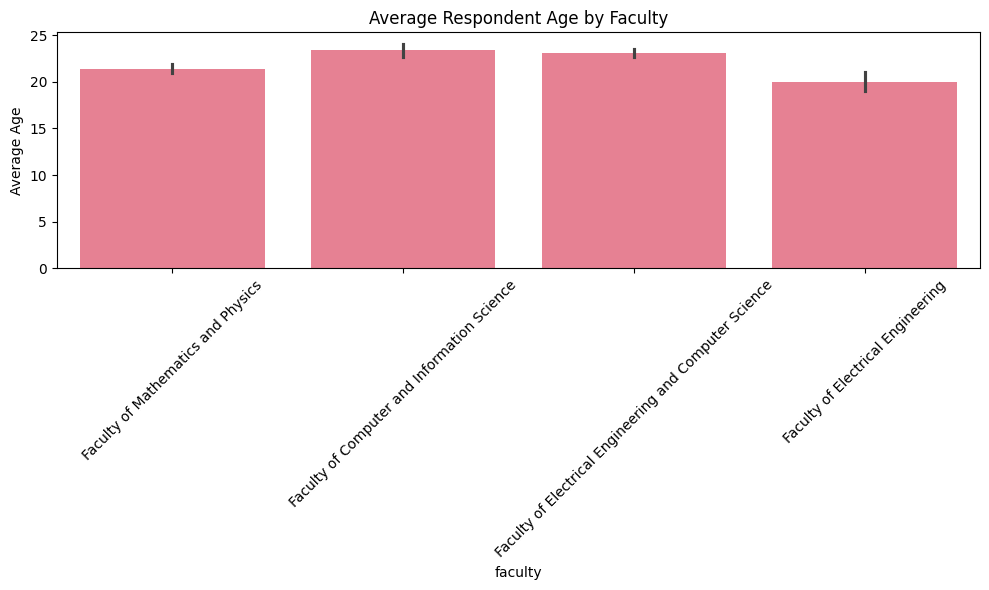

In [30]:
# 21. Faculty vs Phone Price Range
print("21. Faculty vs Phone Price Range")
faculty_price = pd.crosstab(clean_df['faculty'], clean_df['phone_price'])
print(faculty_price)

plt.figure(figsize=(12, 6))
faculty_price.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Phone Price Distribution by Faculty')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 22. Study Year vs Average Age
print("\n22. Study Year vs Average Age")
year_age = clean_df.groupby('study_year')['age'].agg(['mean', 'count', 'std']).round(1)
print(year_age)

plt.figure(figsize=(10, 6))
sns.boxplot(data=clean_df, x='study_year', y='age')
plt.title('Age Distribution by Study Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 23. Phone Brand vs Phone Age
print("\n23. Phone Brand vs Phone Age")
brand_age_stats = clean_df.groupby('phone_brand')['phone_age'].agg(['mean', 'count', 'std']).round(1)
print(brand_age_stats)

plt.figure(figsize=(12, 6))
sns.boxplot(data=clean_df, x='phone_brand', y='phone_age')
plt.title('Phone Age Distribution by Brand')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 24. Replacement Plan vs Disposal Plan
print("\n24. Replacement Plan vs Disposal Plan")
plan_disposal = pd.crosstab(clean_df['replacement_plan'], clean_df['disposal_plan'])
print(plan_disposal)

plt.figure(figsize=(12, 8))
sns.heatmap(plan_disposal, annot=True, cmap='Greens', fmt='d')
plt.title('Disposal Plans by Replacement Timeline')
plt.tight_layout()
plt.show()

# 25. Faculty vs Previous Phone Disposal
print("\n25. Faculty vs Previous Phone Disposal")
faculty_prev_disposal = pd.crosstab(clean_df['faculty'], clean_df['prev_phone_disposal'], normalize='index') * 100
print(faculty_prev_disposal.round(1))

# 26. Phone Price vs Replacement Reason
print("\n26. Phone Price vs Replacement Reason")
price_reason = pd.crosstab(clean_df['phone_price'], clean_df['replacement_reason'])
print(price_reason)

# 27. Study Year vs Replacement Timeline
print("\n27. Study Year vs Replacement Timeline")
year_timeline = pd.crosstab(clean_df['study_year'], clean_df['replacement_plan'], normalize='index') * 100
print(year_timeline.round(1))

# 28. Age vs Replacement Plan
print("\n28. Age vs Replacement Plan")
plt.figure(figsize=(10, 6))
sns.boxplot(data=clean_df, x='replacement_plan', y='age')
plt.title('Age Distribution by Replacement Plan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 29. Phone Brand vs Study Program Type
print("\n29. Phone Brand vs Study Program Type")
if 'study_level' not in clean_df.columns:
    clean_df['study_level'] = clean_df['study_program'].apply(lambda x: 
        'Master' if 'Master' in str(x) else 
        'Bachelor' if 'University' in str(x) or 'Univerzitetni' in str(x) else 
        'Other' if pd.notna(x) else None)

brand_study_level = pd.crosstab(clean_df['phone_brand'], clean_df['study_level'])
print(brand_study_level)

# 30. Faculty vs Average Respondent Age
print("\n30. Faculty vs Average Respondent Age")
faculty_respondent_age = clean_df.groupby('faculty')['age'].agg(['mean', 'count', 'std']).round(1)
print(faculty_respondent_age)

plt.figure(figsize=(10, 6))
sns.barplot(data=clean_df, x='faculty', y='age', estimator='mean')
plt.title('Average Respondent Age by Faculty')
plt.xticks(rotation=45)
plt.ylabel('Average Age')
plt.tight_layout()
plt.show()

Starting automated correlation analysis...
Analyzing correlations for 15 variables...
Variables: ['age', 'phone_age', 'purchase_year', 'faculty', 'study_year', 'phone_brand', 'phone_price', 'replacement_plan', 'replacement_reason', 'disposal_plan', 'prev_phone_replacement_reason', 'prev_phone_disposal', 'phone_os', 'study_level', 'age_group']

CORRELATION ANALYSIS RESULTS

TOP 10 STRONGEST CORRELATIONS:
--------------------------------------------------------------------------------
Variable 1                Variable 2                Correlation  Type            p-value    Sample
--------------------------------------------------------------------------------
phone_age                 purchase_year             -1.000       Pearson         N/A        85
phone_brand               phone_os                  +1.000       Cramer's V      0.0000     86
study_year                prev_phone_replacement_reason +0.720       Cramer's V      0.0000     81
replacement_reason        disposal_plan    

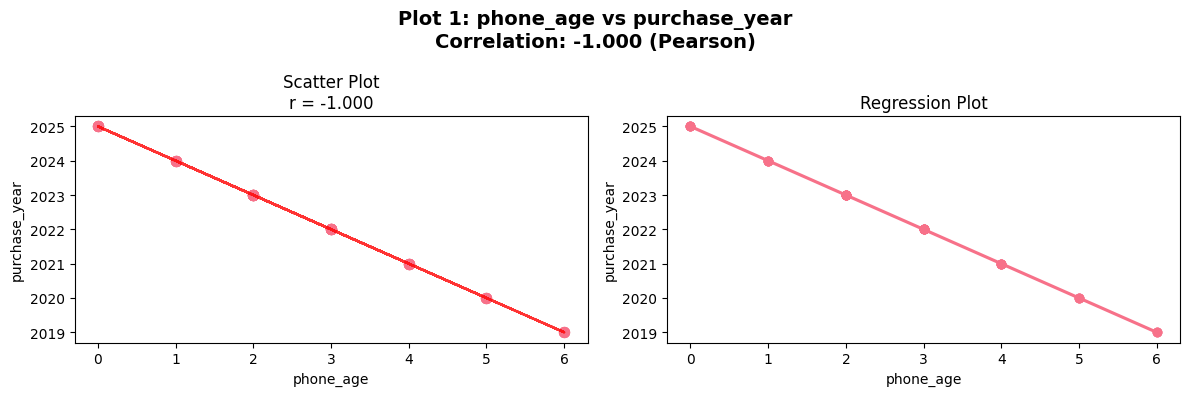


2. phone_brand vs phone_os
   Correlation: 1.000 (Cramer's V)


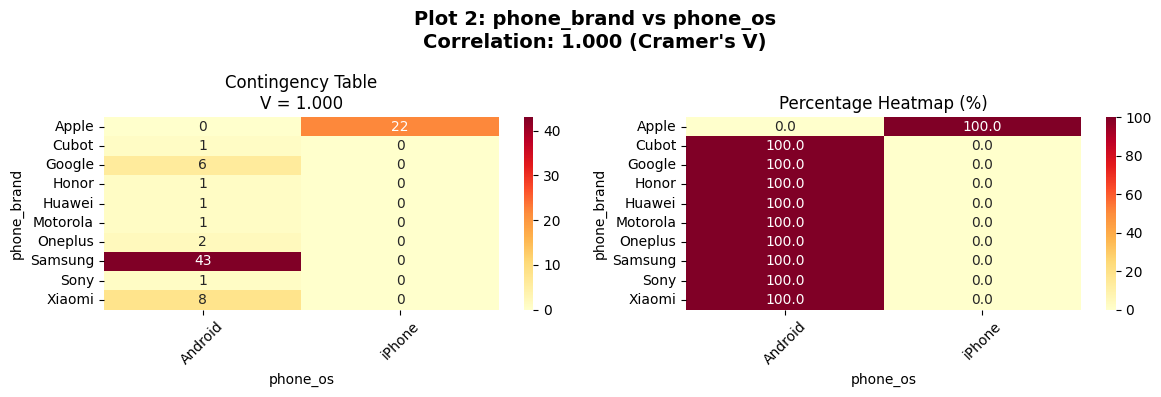


3. study_year vs prev_phone_replacement_reason
   Correlation: 0.720 (Cramer's V)


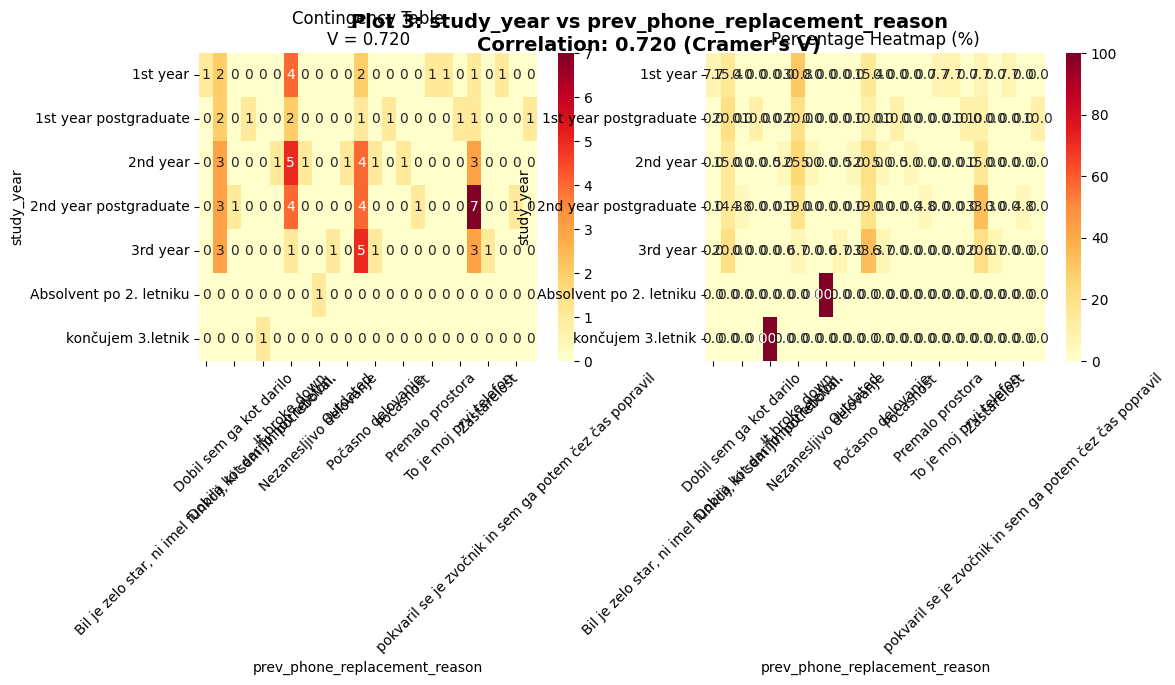


COMPREHENSIVE CORRELATION TABLE

Correlation Matrix (showing absolute values > 0.1):
                                 age  age_group  disposal_plan  faculty  \
age                            1.000        NaN            NaN      NaN   
age_group                        NaN      1.000          0.359    0.429   
disposal_plan                    NaN      0.359          1.000    0.243   
faculty                          NaN      0.429          0.243    1.000   
phone_age                     -0.128        NaN            NaN      NaN   
phone_brand                      NaN      0.323          0.231    0.274   
phone_os                         NaN      0.215          0.448    0.179   
phone_price                      NaN      0.306          0.318    0.324   
prev_phone_disposal              NaN      0.367          0.392    0.289   
prev_phone_replacement_reason    NaN      0.549          0.608    0.527   
purchase_year                  0.128        NaN            NaN      NaN   
replacement_pl

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, pearsonr, pointbiserialr
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

def analyze_correlations(df):
    """
    Automatically find and analyze correlations between variable pairs in the dataframe
    """
    # Select only relevant columns for correlation analysis
    correlation_df = df.copy()
    
    # Prepare numerical and categorical columns
    numerical_cols = ['age', 'phone_age', 'purchase_year']
    categorical_cols = ['faculty', 'study_year', 'phone_brand', 'phone_price', 
                       'replacement_plan', 'replacement_reason', 'disposal_plan',
                       'prev_phone_replacement_reason', 'prev_phone_disposal']
    
    # Add created columns if they exist
    if 'phone_os' in correlation_df.columns:
        categorical_cols.append('phone_os')
    if 'study_level' in correlation_df.columns:
        categorical_cols.append('study_level')
    if 'age_group' in correlation_df.columns:
        categorical_cols.append('age_group')
    
    # Remove columns with too many missing values or low variance
    usable_cols = []
    for col in numerical_cols + categorical_cols:
        if col in correlation_df.columns:
            if correlation_df[col].notna().sum() > len(correlation_df) * 0.1:  # At least 10% non-null
                if correlation_df[col].nunique() > 1:  # More than one unique value
                    usable_cols.append(col)
    
    print(f"Analyzing correlations for {len(usable_cols)} variables...")
    print("Variables:", usable_cols)
    
    # Store correlation results
    correlation_results = []
    
    # Analyze all possible pairs
    for i, col1 in enumerate(usable_cols):
        for j, col2 in enumerate(usable_cols):
            if i < j:  # Avoid duplicate pairs and self-correlation
                corr_strength, corr_type, p_value = calculate_correlation(correlation_df, col1, col2)
                
                if corr_strength is not None and not np.isnan(corr_strength):
                    correlation_results.append({
                        'variable_1': col1,
                        'variable_2': col2,
                        'correlation_strength': abs(corr_strength),
                        'correlation_direction': np.sign(corr_strength) if not np.isnan(corr_strength) else 0,
                        'correlation_type': corr_type,
                        'p_value': p_value,
                        'sample_size': correlation_df[[col1, col2]].dropna().shape[0]
                    })
    
    # Create results dataframe and sort by correlation strength
    results_df = pd.DataFrame(correlation_results)
    if len(results_df) > 0:
        results_df = results_df.sort_values('correlation_strength', ascending=False)
        
        print("\n" + "="*80)
        print("CORRELATION ANALYSIS RESULTS")
        print("="*80)
        
        # Display top correlations
        display_top_correlations(results_df, correlation_df)
        
        # Create visualizations for top 3 correlations
        create_top_correlation_plots(results_df, correlation_df, top_n=3)
        
        # Display correlation table
        display_correlation_table(results_df)
        
    else:
        print("No significant correlations found.")
    
    return results_df

def calculate_correlation(df, col1, col2):
    """
    Calculate appropriate correlation based on variable types
    """
    # Filter out rows with missing values in either column
    temp_df = df[[col1, col2]].dropna()
    
    if len(temp_df) < 10:  # Too few data points
        return None, None, None
    
    # Both numerical
    if col1 in ['age', 'phone_age', 'purchase_year'] and col2 in ['age', 'phone_age', 'purchase_year']:
        try:
            corr, p_value = pearsonr(temp_df[col1], temp_df[col2])
            return corr, 'Pearson', p_value
        except:
            return None, None, None
    
    # One numerical, one categorical
    elif (col1 in ['age', 'phone_age', 'purchase_year'] and col2 not in ['age', 'phone_age', 'purchase_year']) or \
         (col2 in ['age', 'phone_age', 'purchase_year'] and col1 not in ['age', 'phone_age', 'purchase_year']):
        
        # Determine which is numerical and which is categorical
        num_col = col1 if col1 in ['age', 'phone_age', 'purchase_year'] else col2
        cat_col = col2 if col1 in ['age', 'phone_age', 'purchase_year'] else col1
        
        # Point-biserial correlation for binary-like categorical variables
        if temp_df[cat_col].nunique() == 2:
            try:
                # Convert categorical to binary
                cat_encoded = pd.factorize(temp_df[cat_col])[0]
                corr, p_value = pointbiserialr(temp_df[num_col], cat_encoded)
                return corr, 'Point-biserial', p_value
            except:
                pass
        
        # For categorical with more than 2 categories, use ANOVA-like approach (eta squared)
        try:
            groups = temp_df.groupby(cat_col)[num_col].apply(list)
            if len(groups) > 1:
                overall_mean = temp_df[num_col].mean()
                ss_between = sum(len(group) * (group.mean() - overall_mean) ** 2 for group in groups)
                ss_total = sum((x - overall_mean) ** 2 for x in temp_df[num_col])
                eta_squared = ss_between / ss_total if ss_total != 0 else 0
                return np.sqrt(eta_squared), 'Eta', 0.05  # Approximate p-value
            else:
                return None, None, None
        except:
            return None, None, None
    
    # Both categorical - Cramer's V
    else:
        try:
            contingency_table = pd.crosstab(temp_df[col1], temp_df[col2])
            chi2, p_value, dof, expected = chi2_contingency(contingency_table)
            n = contingency_table.sum().sum()
            cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
            return cramers_v, "Cramer's V", p_value
        except:
            return None, None, None

def display_top_correlations(results_df, df):
    """Display the strongest correlations"""
    print("\nTOP 10 STRONGEST CORRELATIONS:")
    print("-" * 80)
    print(f"{'Variable 1':<25} {'Variable 2':<25} {'Correlation':<12} {'Type':<15} {'p-value':<10} {'Sample'}")
    print("-" * 80)
    
    for _, row in results_df.head(10).iterrows():
        corr_str = f"{row['correlation_strength']:.3f}"
        if row['correlation_direction'] > 0:
            corr_str = "+" + corr_str
        elif row['correlation_direction'] < 0:
            corr_str = "-" + corr_str
        
        p_str = f"{row['p_value']:.4f}" if row['p_value'] else "N/A"
        print(f"{row['variable_1']:<25} {row['variable_2']:<25} {corr_str:<12} {row['correlation_type']:<15} {p_str:<10} {row['sample_size']}")

def create_top_correlation_plots(results_df, df, top_n=3):
    """Create visualizations for the top correlations"""
    print(f"\n{'='*80}")
    print(f"TOP {top_n} CORRELATION VISUALIZATIONS")
    print(f"{'='*80}")
    
    for i, (_, row) in enumerate(results_df.head(top_n).iterrows()):
        col1, col2 = row['variable_1'], row['variable_2']
        corr_strength = row['correlation_strength']
        corr_direction = row['correlation_direction']
        corr_type = row['correlation_type']
        
        print(f"\n{i+1}. {col1} vs {col2}")
        print(f"   Correlation: {corr_direction * corr_strength:.3f} ({corr_type})")
        
        # Create appropriate visualization based on variable types
        create_correlation_plot(df, col1, col2, corr_strength, corr_direction, corr_type, i+1)

def create_correlation_plot(df, col1, col2, corr_strength, corr_direction, corr_type, plot_num):
    """Create appropriate plot based on variable types"""
    plt.figure(figsize=(12, 4))
    
    # Filter out missing values
    plot_df = df[[col1, col2]].dropna()
    
    # Both numerical
    if col1 in ['age', 'phone_age', 'purchase_year'] and col2 in ['age', 'phone_age', 'purchase_year']:
        plt.subplot(1, 2, 1)
        plt.scatter(plot_df[col1], plot_df[col2], alpha=0.6, s=50)
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.title(f'Scatter Plot\nr = {corr_direction * corr_strength:.3f}')
        
        # Add trend line
        z = np.polyfit(plot_df[col1], plot_df[col2], 1)
        p = np.poly1d(z)
        plt.plot(plot_df[col1], p(plot_df[col1]), "r--", alpha=0.8)
        
        plt.subplot(1, 2, 2)
        sns.regplot(data=plot_df, x=col1, y=col2, scatter_kws={'alpha':0.6})
        plt.title('Regression Plot')
    
    # One numerical, one categorical
    elif (col1 in ['age', 'phone_age', 'purchase_year'] and col2 not in ['age', 'phone_age', 'purchase_year']) or \
         (col2 in ['age', 'phone_age', 'purchase_year'] and col1 not in ['age', 'phone_age', 'purchase_year']):
        
        num_col = col1 if col1 in ['age', 'phone_age', 'purchase_year'] else col2
        cat_col = col2 if col1 in ['age', 'phone_age', 'purchase_year'] else col1
        
        plt.subplot(1, 2, 1)
        sns.boxplot(data=plot_df, x=cat_col, y=num_col)
        plt.xticks(rotation=45)
        plt.title(f'Box Plot\nη = {corr_strength:.3f}')
        
        plt.subplot(1, 2, 2)
        sns.violinplot(data=plot_df, x=cat_col, y=num_col)
        plt.xticks(rotation=45)
        plt.title('Violin Plot')
    
    # Both categorical
    else:
        plt.subplot(1, 2, 1)
        contingency = pd.crosstab(plot_df[col1], plot_df[col2])
        sns.heatmap(contingency, annot=True, fmt='d', cmap='YlOrRd')
        plt.title(f'Contingency Table\nV = {corr_strength:.3f}')
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
        
        plt.subplot(1, 2, 2)
        contingency_pct = pd.crosstab(plot_df[col1], plot_df[col2], normalize='index') * 100
        sns.heatmap(contingency_pct, annot=True, fmt='.1f', cmap='YlOrRd')
        plt.title('Percentage Heatmap (%)')
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
    
    plt.suptitle(f'Plot {plot_num}: {col1} vs {col2}\nCorrelation: {corr_direction * corr_strength:.3f} ({corr_type})', 
                 fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

def display_correlation_table(results_df):
    """Display a comprehensive correlation table"""
    print(f"\n{'='*80}")
    print("COMPREHENSIVE CORRELATION TABLE")
    print(f"{'='*80}")
    
    # Create a pivot table for easier reading
    variables = sorted(set(results_df['variable_1']).union(set(results_df['variable_2'])))
    corr_matrix = pd.DataFrame(index=variables, columns=variables)
    
    for _, row in results_df.iterrows():
        corr_matrix.loc[row['variable_1'], row['variable_2']] = row['correlation_direction'] * row['correlation_strength']
        corr_matrix.loc[row['variable_2'], row['variable_1']] = row['correlation_direction'] * row['correlation_strength']
    
    # Fill diagonal with 1.0
    for var in variables:
        corr_matrix.loc[var, var] = 1.0
    
    # Display the correlation matrix
    print("\nCorrelation Matrix (showing absolute values > 0.1):")
    display_corr_matrix = corr_matrix.astype(float).round(3)
    # Only show correlations above threshold for readability
    display_corr_matrix[display_corr_matrix.abs() < 0.1] = 0
    print(display_corr_matrix)
    
    # Display interpretation guide
    print(f"\n{'='*80}")
    print("CORRELATION INTERPRETATION GUIDE")
    print(f"{'='*80}")
    print("|r| < 0.1:  No correlation")
    print("0.1 ≤ |r| < 0.3:  Weak correlation")
    print("0.3 ≤ |r| < 0.5:  Moderate correlation")
    print("0.5 ≤ |r| < 0.7:  Strong correlation")
    print("|r| ≥ 0.7:        Very strong correlation")
    print("Positive r: Variables increase together")
    print("Negative r: One variable decreases as the other increases")

# Run the correlation analysis
print("Starting automated correlation analysis...")
correlation_results = analyze_correlations(clean_df)

# Additional analysis: Find the most interesting insights
if len(correlation_results) > 0:
    print(f"\n{'='*80}")
    print("KEY INSIGHTS")
    print(f"{'='*80}")
    
    # Strongest positive correlation
    strongest_positive = correlation_results[correlation_results['correlation_direction'] > 0].iloc[0]
    print(f"Strongest Positive Relationship: {strongest_positive['variable_1']} ↔ {strongest_positive['variable_2']}")
    print(f"  Correlation: +{strongest_positive['correlation_strength']:.3f}")
    
    # Strongest negative correlation (if any)
    negative_corrs = correlation_results[correlation_results['correlation_direction'] < 0]
    if len(negative_corrs) > 0:
        strongest_negative = negative_corrs.iloc[0]
        print(f"Strongest Negative Relationship: {strongest_negative['variable_1']} ↔ {strongest_negative['variable_2']}")
        print(f"  Correlation: -{strongest_negative['correlation_strength']:.3f}")
    
    # Most surprising correlation (moderate but unexpected)
    moderate_corrs = correlation_results[
        (correlation_results['correlation_strength'] > 0.3) & 
        (correlation_results['correlation_strength'] < 0.7)
    ]
    if len(moderate_corrs) > 0:
        surprising = moderate_corrs.iloc[0]
        print(f"Interesting Moderate Relationship: {surprising['variable_1']} ↔ {surprising['variable_2']}")
        print(f"  Correlation: {surprising['correlation_direction'] * surprising['correlation_strength']:.3f}")

Starting automated correlation analysis with Age Groups...
Analyzing correlations for 12 categorical variables...
Variables: ['age_group', 'faculty', 'study_year', 'phone_brand', 'phone_price', 'replacement_plan', 'replacement_reason', 'disposal_plan', 'prev_phone_replacement_reason', 'prev_phone_disposal', 'phone_os', 'study_level']

CORRELATION ANALYSIS RESULTS (Categorical Variables)

TOP 10 STRONGEST CORRELATIONS (Cramer's V):
--------------------------------------------------------------------------------
Variable 1           Variable 2           Cramers V    p-value    Sample   Interpretation 
--------------------------------------------------------------------------------
phone_brand          phone_os             0.951       0.0000     86       Strong         
faculty              study_level          0.658       0.0000     82       Strong         
study_year           study_level          0.587       0.0000     78       Strong         
replacement_reason   disposal_plan        

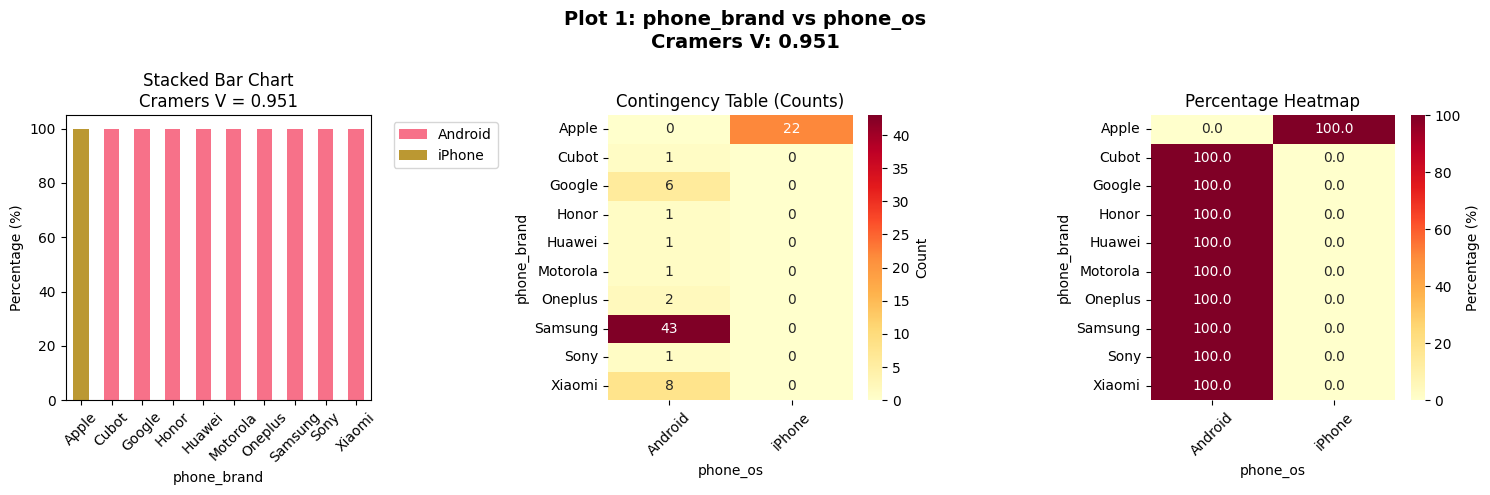


2. faculty vs study_level
   Cramer's V: 0.658


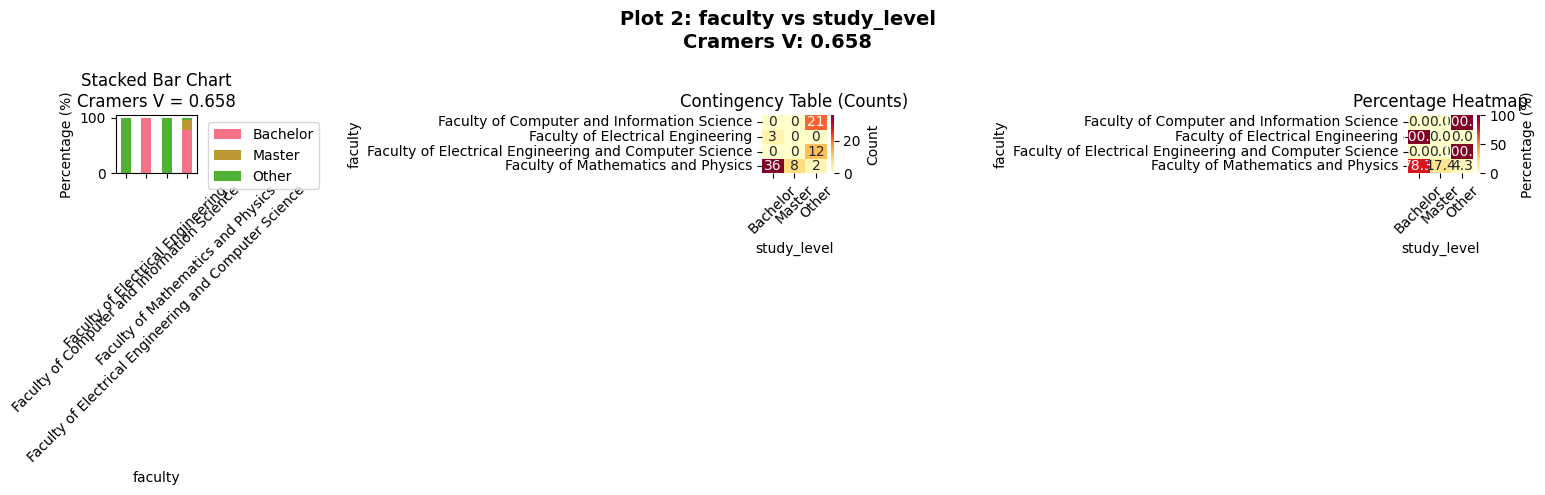


3. study_year vs study_level
   Cramer's V: 0.587


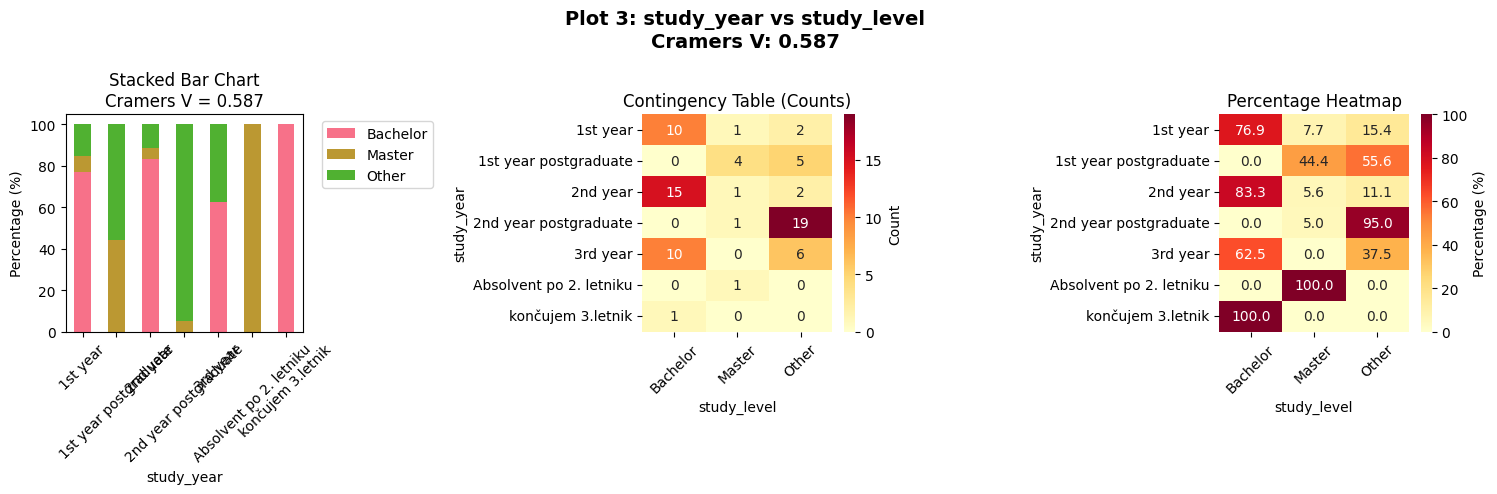


COMPREHENSIVE CORRELATION TABLE (Cramer's V)

Correlation Matrix (Cramer's V):
                               age_group  disposal_plan  faculty  phone_brand  \
age_group                          1.000          0.242    0.393        0.000   
disposal_plan                      0.242          1.000    0.000        0.000   
faculty                            0.393          0.000    1.000        0.000   
phone_brand                        0.000          0.000    0.000        1.000   
phone_os                           0.107          0.361    0.000        0.951   
phone_price                        0.187          0.174    0.217        0.280   
prev_phone_disposal                0.127          0.220    0.000        0.327   
prev_phone_replacement_reason      0.127          0.315    0.000        0.423   
replacement_plan                   0.000          0.000    0.205        0.000   
replacement_reason                 0.279          0.582    0.000        0.000   
study_level                  

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

def cramers_v(contingency_table):
    """Calculate Cramer's V statistic for categorical-categorical association"""
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

def create_age_groups(df):
    """Create age groups from numerical age data"""
    df_processed = df.copy()
    
    # Create age groups if age data exists
    if 'age' in df_processed.columns and df_processed['age'].notna().sum() > 0:
        # Define age groups
        bins = [18, 20, 22, 24, 30]
        labels = ['18-20', '21-22', '23-24', '25+']
        df_processed['age_group'] = pd.cut(df_processed['age'], bins=bins, labels=labels)
    
    return df_processed

def analyze_correlations(df):
    """
    Automatically find and analyze correlations between variable pairs in the dataframe
    """
    # Process data to create age groups
    correlation_df = create_age_groups(df)
    
    # Select only relevant columns for correlation analysis
    categorical_cols = ['age_group', 'faculty', 'study_year', 'phone_brand', 'phone_price', 
                       'replacement_plan', 'replacement_reason', 'disposal_plan',
                       'prev_phone_replacement_reason', 'prev_phone_disposal']
    
    # Add created columns if they exist
    if 'phone_os' in correlation_df.columns:
        categorical_cols.append('phone_os')
    if 'study_level' in correlation_df.columns:
        categorical_cols.append('study_level')
    
    # Remove columns with too many missing values or low variance
    usable_cols = []
    for col in categorical_cols:
        if col in correlation_df.columns:
            if correlation_df[col].notna().sum() > len(correlation_df) * 0.1:  # At least 10% non-null
                if correlation_df[col].nunique() > 1:  # More than one unique value
                    usable_cols.append(col)
    
    print(f"Analyzing correlations for {len(usable_cols)} categorical variables...")
    print("Variables:", usable_cols)
    
    # Store correlation results
    correlation_results = []
    
    # Analyze all possible pairs using Cramer's V for categorical-categorical correlations
    for i, col1 in enumerate(usable_cols):
        for j, col2 in enumerate(usable_cols):
            if i < j:  # Avoid duplicate pairs and self-correlation
                corr_strength, p_value = calculate_cramers_v(correlation_df, col1, col2)
                
                if corr_strength is not None and not np.isnan(corr_strength):
                    correlation_results.append({
                        'variable_1': col1,
                        'variable_2': col2,
                        'correlation_strength': corr_strength,
                        'p_value': p_value,
                        'sample_size': correlation_df[[col1, col2]].dropna().shape[0]
                    })
    
    # Create results dataframe and sort by correlation strength
    results_df = pd.DataFrame(correlation_results)
    if len(results_df) > 0:
        results_df = results_df.sort_values('correlation_strength', ascending=False)
        
        print("\n" + "="*80)
        print("CORRELATION ANALYSIS RESULTS (Categorical Variables)")
        print("="*80)
        
        # Display top correlations
        display_top_correlations(results_df, correlation_df)
        
        # Create visualizations for top 3 correlations
        create_top_correlation_plots(results_df, correlation_df, top_n=3)
        
        # Display correlation table
        display_correlation_table(results_df)
        
    else:
        print("No significant correlations found.")
    
    return results_df, correlation_df

def calculate_cramers_v(df, col1, col2):
    """
    Calculate Cramer's V for two categorical variables
    """
    # Filter out rows with missing values in either column
    temp_df = df[[col1, col2]].dropna()
    
    if len(temp_df) < 10:  # Too few data points
        return None, None
    
    try:
        # Create contingency table
        contingency_table = pd.crosstab(temp_df[col1], temp_df[col2])
        
        # Calculate Cramer's V using our custom function
        cramers_v_value = cramers_v(contingency_table)
        
        # Calculate p-value from chi-squared test
        _, p_value, _, _ = chi2_contingency(contingency_table)
        
        return cramers_v_value, p_value
        
    except Exception as e:
        return None, None

def display_top_correlations(results_df, df):
    """Display the strongest correlations"""
    print("\nTOP 10 STRONGEST CORRELATIONS (Cramer's V):")
    print("-" * 80)
    print(f"{'Variable 1':<20} {'Variable 2':<20} {'Cramers V':<12} {'p-value':<10} {'Sample':<8} {'Interpretation':<15}")
    print("-" * 80)
    
    for _, row in results_df.head(10).iterrows():
        corr_strength = row['correlation_strength']
        p_str = f"{row['p_value']:.4f}" if row['p_value'] else "N/A"
        
        # Interpretation based on Cramer's V
        if corr_strength < 0.1:
            interpretation = "Very weak"
        elif corr_strength < 0.2:
            interpretation = "Weak"
        elif corr_strength < 0.3:
            interpretation = "Moderate"
        elif corr_strength < 0.4:
            interpretation = "Relatively strong"
        else:
            interpretation = "Strong"
        
        print(f"{row['variable_1']:<20} {row['variable_2']:<20} {corr_strength:.3f}       {p_str:<10} {row['sample_size']:<8} {interpretation:<15}")

def create_top_correlation_plots(results_df, df, top_n=3):
    """Create visualizations for the top correlations"""
    print(f"\n{'='*80}")
    print(f"TOP {top_n} CORRELATION VISUALIZATIONS")
    print(f"{'='*80}")
    
    for i, (_, row) in enumerate(results_df.head(top_n).iterrows()):
        col1, col2 = row['variable_1'], row['variable_2']
        corr_strength = row['correlation_strength']
        
        print(f"\n{i+1}. {col1} vs {col2}")
        print(f"   Cramer's V: {corr_strength:.3f}")
        
        # Create visualization
        create_correlation_plot(df, col1, col2, corr_strength, i+1)

def create_correlation_plot(df, col1, col2, corr_strength, plot_num):
    """Create appropriate plot for categorical-categorical correlations"""
    plt.figure(figsize=(15, 5))
    
    # Filter out missing values
    plot_df = df[[col1, col2]].dropna()
    
    # Plot 1: Stacked bar chart
    plt.subplot(1, 3, 1)
    contingency = pd.crosstab(plot_df[col1], plot_df[col2])
    contingency_pct = contingency.div(contingency.sum(axis=1), axis=0) * 100
    
    contingency_pct.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'Stacked Bar Chart\nCramers V = {corr_strength:.3f}')
    plt.xlabel(col1)
    plt.ylabel('Percentage (%)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    
    # Plot 2: Heatmap (counts)
    plt.subplot(1, 3, 2)
    sns.heatmap(contingency, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Count'})
    plt.title('Contingency Table (Counts)')
    plt.xlabel(col2)
    plt.ylabel(col1)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    
    # Plot 3: Heatmap (percentages)
    plt.subplot(1, 3, 3)
    sns.heatmap(contingency_pct, annot=True, fmt='.1f', cmap='YlOrRd', cbar_kws={'label': 'Percentage (%)'})
    plt.title('Percentage Heatmap')
    plt.xlabel(col2)
    plt.ylabel(col1)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    
    plt.suptitle(f'Plot {plot_num}: {col1} vs {col2}\nCramers V: {corr_strength:.3f}', 
                 fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

def display_correlation_table(results_df):
    """Display a comprehensive correlation table"""
    print(f"\n{'='*80}")
    print("COMPREHENSIVE CORRELATION TABLE (Cramer's V)")
    print(f"{'='*80}")
    
    # Create a pivot table for easier reading
    variables = sorted(set(results_df['variable_1']).union(set(results_df['variable_2'])))
    corr_matrix = pd.DataFrame(index=variables, columns=variables)
    
    for _, row in results_df.iterrows():
        corr_matrix.loc[row['variable_1'], row['variable_2']] = row['correlation_strength']
        corr_matrix.loc[row['variable_2'], row['variable_1']] = row['correlation_strength']
    
    # Fill diagonal with 1.0
    for var in variables:
        corr_matrix.loc[var, var] = 1.0
    
    # Display the correlation matrix
    print("\nCorrelation Matrix (Cramer's V):")
    display_corr_matrix = corr_matrix.astype(float).round(3)
    # Only show correlations above threshold for readability
    display_corr_matrix[display_corr_matrix < 0.1] = 0
    print(display_corr_matrix)
    
    # Display interpretation guide for Cramer's V
    print(f"\n{'='*80}")
    print("CRAMER'S V INTERPRETATION GUIDE")
    print(f"{'='*80}")
    print("V < 0.1:    Very weak association")
    print("0.1 ≤ V < 0.2: Weak association")
    print("0.2 ≤ V < 0.3: Moderate association")
    print("0.3 ≤ V < 0.4: Relatively strong association")
    print("V ≥ 0.4:      Strong association")
    print("\nNote: Cramer's V measures association strength between categorical variables")
    print("Values range from 0 (no association) to 1 (perfect association)")

def analyze_age_group_specific_patterns(df_with_age_groups):
    """Special analysis focusing on age group patterns"""
    print(f"\n{'='*80}")
    print("AGE GROUP SPECIFIC ANALYSIS")
    print(f"{'='*80}")
    
    if 'age_group' not in df_with_age_groups.columns:
        print("No age group data available for analysis")
        return
    
    # Analyze age group distribution
    age_distribution = df_with_age_groups['age_group'].value_counts().sort_index()
    print("\nAge Group Distribution:")
    for age_group, count in age_distribution.items():
        percentage = (count / len(df_with_age_groups)) * 100
        print(f"  {age_group}: {count} respondents ({percentage:.1f}%)")
    
    # Find variables with strongest association with age groups
    age_correlations = []
    other_vars = [col for col in df_with_age_groups.columns if col != 'age_group' and col in ['faculty', 'phone_brand', 'phone_price', 'replacement_plan', 'disposal_plan']]
    
    for var in other_vars:
        if var in df_with_age_groups.columns:
            corr_strength, p_value = calculate_cramers_v(df_with_age_groups, 'age_group', var)
            if corr_strength is not None:
                age_correlations.append({
                    'variable': var,
                    'cramers_v': corr_strength,
                    'p_value': p_value
                })
    
    if age_correlations:
        age_correlations_df = pd.DataFrame(age_correlations).sort_values('cramers_v', ascending=False)
        print("\nVariables most associated with Age Groups:")
        print("-" * 50)
        for _, row in age_correlations_df.head(5).iterrows():
            print(f"  {row['variable']}: Cramer's V = {row['cramers_v']:.3f}")
        
        # Show detailed breakdown for top variable
        top_var = age_correlations_df.iloc[0]['variable']
        print(f"\nDetailed breakdown: Age Group vs {top_var}")
        contingency = pd.crosstab(df_with_age_groups['age_group'], df_with_age_groups[top_var], normalize='index') * 100
        print(contingency.round(1))

# Run the correlation analysis
print("Starting automated correlation analysis with Age Groups...")
correlation_results, processed_df = analyze_correlations(clean_df)

# Run age group specific analysis
analyze_age_group_specific_patterns(processed_df)

# Additional insights
if len(correlation_results) > 0:
    print(f"\n{'='*80}")
    print("KEY INSIGHTS")
    print(f"{'='*80}")
    
    # Strongest overall correlation
    strongest = correlation_results.iloc[0]
    print(f"Strongest Overall Association: {strongest['variable_1']} ↔ {strongest['variable_2']}")
    print(f"  Cramer's V: {strongest['correlation_strength']:.3f}")
    
    # Strongest correlation involving age groups
    age_correlations = correlation_results[
        (correlation_results['variable_1'] == 'age_group') | 
        (correlation_results['variable_2'] == 'age_group')
    ]
    if len(age_correlations) > 0:
        strongest_age = age_correlations.iloc[0]
        other_var = strongest_age['variable_2'] if strongest_age['variable_1'] == 'age_group' else strongest_age['variable_1']
        print(f"Strongest Age Group Association: Age Group ↔ {other_var}")
        print(f"  Cramer's V: {strongest_age['correlation_strength']:.3f}")
    
    # Most surprising moderate association
    moderate_associations = correlation_results[
        (correlation_results['correlation_strength'] > 0.2) & 
        (correlation_results['correlation_strength'] < 0.4)
    ]
    if len(moderate_associations) > 0:
        surprising = moderate_associations.iloc[0]
        print(f"Interesting Moderate Association: {surprising['variable_1']} ↔ {surprising['variable_2']}")
        print(f"  Cramer's V: {surprising['correlation_strength']:.3f}")